# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore') 

# Usefull Functions for data Analysis

In [2]:
class SeabornPlots:  
    def __init__(self, df):  
        self.df = df
        
  
    # Function for line chart
    def LineChart(self,_title,variables,rotation=0):
        plt.figure(figsize=(15,10))
        if len(variables)==2:
            sns.lineplot(x=variables[0], y=variables[1], data=self.df,legend= False)
        elif len(variables)==3:
            sns.lineplot(x=variables[0], y=variables[1], data=self.df,hue=variables[2])
        else:
            print("Incorrect Number of Variables Passed")
        
        plt.xticks(rotation= rotation)
        plt.xlabel(variables[0])
        plt.ylabel(variables[1])
        plt.title(_title)
        plt.show()
        
    
    # Function for Histogram chart
    def HistogramChart(self,_title,variables,kde=True):
        f,ax = plt.subplots(figsize=(20, 15))
        sns.distplot(self.df[variables],kde = kde)
        plt.title(_title)
        plt.xlabel(variables)
        plt.ylabel("Density")
        plt.show()
        
    # Function for Bar chart
    def BarChart(self,_title,variables,rotation=0):
        plt.figure(figsize=(15,10))
        if len(variables)==2:
            sns.barplot(x=variables[0], y=variables[1], data=self.df)
        elif len(variables)==3:
            sns.barplot(x=variables[0], y=variables[1], data=self.df,hue=variables[2])
        else:
            print("Incorrect Number of Variables Passed")
        
        plt.xticks(rotation= rotation)
        plt.xlabel(variables[0])
        plt.ylabel(variables[1])
        plt.title(_title)
        plt.show()
        
        
    # Function for Scatter chart
    def ScatterChart(self,_title,variables,rotation=0):
        plt.figure(figsize=(15,10))
        if len(variables)==2:
            sns.regplot(x=variables[0], y=variables[1], data=self.df)
        elif len(variables)==3:
            sns.regplot(x=variables[0], y=variables[1], data=self.df,hue=variables[2])
        else:
            print("Incorrect Number of Variables Passed")
        
        plt.xticks(rotation= rotation)
        plt.xlabel(variables[0])
        plt.ylabel(variables[1])
        plt.title(_title)
        plt.show()
   
        
    # Function for Point chart
    def PointChart(self,_title,variables,rotation=0):
        plt.figure(figsize=(15,10))
        if len(variables)==2:
            sns.pointplot(x=variables[0], y=variables[1], data=self.df,palette = sns.cubehelix_palette(len(variables[0])))
        elif len(variables)==3:
            sns.pointplot(x=variables[0], y=variables[1], data=self.df,hue=variables[2])
        else:
            print("Incorrect Number of Variables Passed")
        
        plt.xticks(rotation= rotation)
        plt.xlabel(variables[0])
        plt.ylabel(variables[1])
        plt.title(_title)
        plt.show()
        
    # Function for Pie chart
    def PieChart(self,_title,variables):
        plt.figure(figsize=(15,10))
        if len(variables)==2:
            plt.pie(variables[1], labels=variables[0], autopct='%1.1f%%')
        else:
            print("Incorrect Number of Variables Passed")
        plt.title(_title)
        plt.show()
        
    # Function for Heat Map chart
    def HeatMapChart(self,_title,variables):
        f,ax = plt.subplots(figsize=(20, 15))
        sns.heatmap(variables, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
        plt.title(_title)
        plt.show()
        
    # Function for Boxplot chart
    def BoxplotMChart(self,_title,variables,rotation=0):
        plt.figure(figsize=(15,10))
        if len(variables)==1:
            sns.boxplot(y=variables[0], data=self.df)
            plt.ylabel(variables[0])
        elif len(variables)==2:
            sns.boxplot(x=variables[0], y=variables[1], data=self.df,palette = "PRGn")
            plt.xlabel(variables[0])
            plt.ylabel(variables[1])
        elif len(variables)==3:
            sns.boxplot(x=variables[0], y=variables[1], data=self.df,hue=variables[2])
            plt.xlabel(variables[0])
            plt.ylabel(variables[1])
        else:
            print("Incorrect Number of Variables Passed")
        
        plt.title(_title)
        plt.xticks(rotation= rotation)
        plt.show()
        
           
    # Function for Pair Plot
    def PairPlotChart(self,variables):
        plt.figure(figsize=(15,10))
        sns.pairplot(self.df[variables])        
        plt.show()
        
    # Function for Count Plot
    def CountPlotChart(self,variable,rotation=0):
        plt.figure(figsize=(15,10))
        if len(variable)==1:
            sns.countplot(self.df[variable[0]])
        elif len(variable)==2:
            sns.countplot(self.df[variable[0]],hue=self.df[variable[1]])
        else:
            print("Incorrect Number of Variables Passed")
        title = "Count Plot of "+variable[0]
        plt.xlabel(variable[0])
        plt.xticks(rotation= rotation)
        plt.ylabel("Total Count")
        plt.title(title)        
        plt.show()
        
    

In [3]:
# Function to differentiate Categorical and continious data

def TypeData(X):
    cat = []
    con = []
    unknown = []
    for i in X.columns:
        if(X[i].dtype=="object"):
            cat.append(i)
        elif(X[i].dtype=="float64"):
            con.append(i)
        else:
            unknown.append(i)
    return(cat,con,unknown)

In [4]:
# Function to return Counts

def TotalCounts(X):
    
    return(X.value_counts())


In [5]:
# Function to extract rows with filter conditions

def FilterTableCondition(df,col,condition):
    cats = []
    z = TotalCounts(df[col])
    for i in z.index:
        if z[i]>=condition:
            cats.append(i)
    df = df[df[col].isin(cats)]
    return df[[col,'Good_Bad']]

# Function to extract Top given values with Max values

def FilterTableTop(df,col,condition):
    z = TotalCounts(df[col])
    cats = z.index[0:condition]
    df = df[df[col].isin(cats)]
    return df[[col,'Good_Bad']]

# Reading file for explore

In [6]:
df = pd.read_csv("Assignment DS.csv")
df.head()

UID Good_Bad CUSTOMER_PROFILE_CODE LOCATIONNAME  \
0    1      Bad               PROF270      MADURAI   
1    2     Good               PROF218      KOLKATA   
2    3     Good               PROF305       NAGPUR   
3    4     Good               PROF356    AHMEDABAD   
4    5      Bad               PROF300       NAGPUR   

                                      VEHICLEMODEL  ASSETCOST  LOANAMOUNT  \
0                   HONDA CITY 1.5 GXI PETROL 2008   900000.0    350000.0   
1             MARUTI SUZUKI EECO 7 STR PETROL 2011   400000.0    125250.0   
2              MARUTI SUZUKI SWIFT VDI DIESEL 2013   450000.0    329250.0   
3               FORD ENDEAVOUR XLT 4X2 DIESEL 2008   600000.0    300000.0   
4  MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013   550000.0    429250.0   

       EMI  TENURE ADDRESSCONFIRMED  ... ASSETREGYEAR LANDOWNERSHIP  \
0  13369.0    36.0                Y  ...          0.0           NaN   
1   5428.0    30.0                Y  ...          0.0           NaN   
2   8536.0    60.0                Y  ...          0.0           NaN   
3  11084.0    36.0                Y  ...          0.0           NaN   
4  15898.0    36.0                Y  ...          0.0           NaN   

   IRRIGATIONSOURCE  CROPSCULTIVATED  DISTFROMSCELOCATION  \
0               NaN              NaN                  0.0   
1               NaN              NaN                  0.0   
2               NaN              NaN                  0.0   
3               NaN              NaN                  0.0   
4               NaN              NaN                  0.0   

  DISTFROMDEALERLOCATION  IMGCONFIRM  TOTALEXPENSEPERMONTH  NETINCOMEPERMONTH  \
0                    0.0           Y                   0.0            80000.0   
1                    0.0           Y                8000.0            27000.0   
2                    0.0           Y                   0.0            50000.0   
3                    0.0           Y                   0.0            60000.0   
4                    0.0           Y               10000.0            30000.0   

   FOIR  
0  17.0  
1  20.0  
2  17.0  
3  18.0  
4  53.0  

[5 rows x 49 columns]

In [7]:
# information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UID                       10000 non-null  int64  
 1   Good_Bad                  10000 non-null  object 
 2   CUSTOMER_PROFILE_CODE     10000 non-null  object 
 3   LOCATIONNAME              9872 non-null   object 
 4   VEHICLEMODEL              9853 non-null   object 
 5   ASSETCOST                 9855 non-null   float64
 6   LOANAMOUNT                9855 non-null   float64
 7   EMI                       9855 non-null   float64
 8   TENURE                    9855 non-null   float64
 9   ADDRESSCONFIRMED          9855 non-null   object 
 10  DESIGNATION               9780 non-null   object 
 11  RESIDENCETYPE             9758 non-null   object 
 12  NOOFYEARSINSAMECITY       9758 non-null   float64
 13  RESIDENCESTABILITY        9781 non-null   float64
 14  RESIDEN

# Treating the dataset for further Analysis

In [8]:
# As it can be observed that 'ASSETREGMONTH','LANDOWNERSHIP','IRRIGATIONSOURCE','CROPSCULTIVATED' have 0 values or records.
# So they are not needed for further Analysis
df = df.drop(['ASSETREGMONTH','LANDOWNERSHIP','IRRIGATIONSOURCE','CROPSCULTIVATED'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UID                       10000 non-null  int64  
 1   Good_Bad                  10000 non-null  object 
 2   CUSTOMER_PROFILE_CODE     10000 non-null  object 
 3   LOCATIONNAME              9872 non-null   object 
 4   VEHICLEMODEL              9853 non-null   object 
 5   ASSETCOST                 9855 non-null   float64
 6   LOANAMOUNT                9855 non-null   float64
 7   EMI                       9855 non-null   float64
 8   TENURE                    9855 non-null   float64
 9   ADDRESSCONFIRMED          9855 non-null   object 
 10  DESIGNATION               9780 non-null   object 
 11  RESIDENCETYPE             9758 non-null   object 
 12  NOOFYEARSINSAMECITY       9758 non-null   float64
 13  RESIDENCESTABILITY        9781 non-null   float64
 14  RESIDEN

In [9]:
# Now, there is no need of UID  and CUSTOMER_PROFILE_CODE as they are identification columns of records. Hence, removing them too.
df = df.drop(['UID','CUSTOMER_PROFILE_CODE'],axis=1)
df = df[df['Good_Bad']!='0']

In [10]:
# Now checking the missing values. There could be some reason for them to be missing or not.

print(df.isnull().sum())

# It can be observed that there are lots of missing values in aproximately all columns
# Good_Bad is the target variable and have no missing value. So there is no need to fix the missing values.

Good_Bad                       0
LOCATIONNAME                 128
VEHICLEMODEL                 147
ASSETCOST                    145
LOANAMOUNT                   145
EMI                          145
TENURE                       145
ADDRESSCONFIRMED             145
DESIGNATION                  220
RESIDENCETYPE                242
NOOFYEARSINSAMECITY          242
RESIDENCESTABILITY           219
RESIDENCELOCALITY            222
BUSINESSCATEGORY             223
BUSINESSMARGINGROSS          119
INCOMEEMPLOYMENT             148
STABILITYINBUSINESS          112
STABILITYCONFIRMED           107
STABILTIYCONFIRMEDTHRU      1800
ISFAMILYINVOLVED             110
OFFICETYPE                   224
MONTHLYTURNOVER              109
STOCKVALUEINHAND             109
BUSINESSMARGINNET            113
NOOFEMPLOYEES                126
NAMEBOARDSEEN                126
OFFICELOCALITY               242
ISRESIDENCECOMEOFFICE        180
ENDUSEOFLOAN                 249
ENDUSEOFASSET                258
ASSETLOCAT

In [11]:
# Descriptive statistics
df.describe()

ASSETCOST    LOANAMOUNT            EMI       TENURE  \
count  9.855000e+03  9.855000e+03    9855.000000  9855.000000   
mean   5.287254e+05  3.870046e+05   12234.161542    45.119432   
std    3.183957e+05  2.386860e+05    6718.607922    12.179016   
min    0.000000e+00  5.000000e+04    1402.000000    12.000000   
25%    3.000000e+05  2.241250e+05    7750.000000    36.000000   
50%    4.750000e+05  3.500000e+05   11114.000000    48.000000   
75%    6.500000e+05  5.000000e+05   14918.000000    60.000000   
max    7.200000e+06  3.512750e+06  103000.000000    60.000000   

       NOOFYEARSINSAMECITY  RESIDENCESTABILITY  RESIDENCELOCALITY  \
count          9758.000000         9781.000000        9778.000000   
mean             26.650618           78.625360           3.053385   
std              14.088494         4424.230301           0.515896   
min               0.000000            0.000000           0.000000   
25%              20.000000            8.000000           3.000000   
50%              25.000000           20.000000           3.000000   
75%              35.000000           30.000000           3.000000   
max             401.000000       411014.000000           6.000000   

       BUSINESSMARGINGROSS  INCOMEEMPLOYMENT  STABILITYINBUSINESS  ...  \
count          9881.000000      9.852000e+03          9888.000000  ...   
mean              8.111831      1.600213e+05            14.963028  ...   
std              20.962192      5.049913e+06           301.708315  ...   
min               0.000000      0.000000e+00             0.000000  ...   
25%               0.000000      4.000000e+04             5.000000  ...   
50%               0.000000      5.900000e+04            10.000000  ...   
75%               0.000000      1.000000e+05            15.000000  ...   
max             100.000000      5.000000e+08         30000.000000  ...   

       MONTHLYTURNOVER  STOCKVALUEINHAND  ENDUSEOFASSET  \
count     9.891000e+03      9.891000e+03    9742.000000   
mean      2.202182e+05      1.496333e+05       1.083297   
std       3.388825e+06      2.777251e+06       1.386184   
min       0.000000e+00      0.000000e+00       1.000000   
25%       0.000000e+00      0.000000e+00       1.000000   
50%       0.000000e+00      0.000000e+00       1.000000   
75%       4.000000e+04      0.000000e+00       1.000000   
max       2.100000e+08      2.500000e+08      78.527960   

       CURRENTBUSINESSSTABILITY  ASSETREGYEAR  DISTFROMSCELOCATION  \
count               9815.000000        9786.0               9786.0   
mean                  18.101189           0.0                  0.0   
std                  706.511723           0.0                  0.0   
min                    0.000000           0.0                  0.0   
25%                    5.000000           0.0                  0.0   
50%                   10.000000           0.0                  0.0   
75%                   15.000000           0.0                  0.0   
max                70000.000000           0.0                  0.0   

       DISTFROMDEALERLOCATION  TOTALEXPENSEPERMONTH  NETINCOMEPERMONTH  \
count                  9786.0          9.151000e+03       9.151000e+03   
mean                      0.0          2.829575e+04       7.112327e+04   
std                       0.0          1.230618e+05       2.968032e+05   
min                       0.0          0.000000e+00      -2.200000e+05   
25%                       0.0          2.500000e+01       2.800000e+04   
50%                       0.0          1.200000e+04       4.000000e+04   
75%                       0.0          2.500000e+04       6.638050e+04   
max                       0.0          8.267919e+06       1.800000e+07   

               FOIR  
count  9.151000e+03  
mean   9.675921e+16  
std    9.397766e+17  
min   -7.000000e+01  
25%    1.700000e+01  
50%    2.600000e+01  
75%    4.000000e+01  
max    9.223370e+18  

[8 rows x 21 columns]

In [12]:
# Differentiating Columns in Categorical and Continious
Categorical_columns,Continious_columns,Unknown = TypeData(df)
print("\nCategorical columns = ",Categorical_columns)
print("\n\n\nContinious columns = ",Continious_columns)
print("\n\n\nUnknown columns = ",Unknown)


Categorical columns =  ['Good_Bad', 'LOCATIONNAME', 'VEHICLEMODEL', 'ADDRESSCONFIRMED', 'DESIGNATION', 'RESIDENCETYPE', 'BUSINESSCATEGORY', 'STABILITYCONFIRMED', 'ISFAMILYINVOLVED', 'OFFICETYPE', 'BUSINESSMARGINNET', 'NOOFEMPLOYEES', 'NAMEBOARDSEEN', 'OFFICELOCALITY', 'ISRESIDENCECOMEOFFICE', 'ENDUSEOFLOAN', 'ASSETLOCATION', 'NEIGHBOURREF', 'POLITICALLINK', 'PROFESSIONTYPE', 'APPLICANTDESIGNATION', 'IMGCONFIRM']



Continious columns =  ['ASSETCOST', 'LOANAMOUNT', 'EMI', 'TENURE', 'NOOFYEARSINSAMECITY', 'RESIDENCESTABILITY', 'RESIDENCELOCALITY', 'BUSINESSMARGINGROSS', 'INCOMEEMPLOYMENT', 'STABILITYINBUSINESS', 'STABILTIYCONFIRMEDTHRU', 'MONTHLYTURNOVER', 'STOCKVALUEINHAND', 'ENDUSEOFASSET', 'CURRENTBUSINESSSTABILITY', 'ASSETREGYEAR', 'DISTFROMSCELOCATION', 'DISTFROMDEALERLOCATION', 'TOTALEXPENSEPERMONTH', 'NETINCOMEPERMONTH', 'FOIR']



Unknown columns =  []


In [13]:
df_feature = df.dropna()
X_temp = df_feature.drop(Categorical_columns,axis=1)
Y_temp = df_feature[['Good_Bad']]
print(X_temp.head())
print(Y_temp.head())

   ASSETCOST  LOANAMOUNT      EMI  TENURE  NOOFYEARSINSAMECITY  \
0   900000.0    350000.0  13369.0    36.0                 20.0   
1   400000.0    125250.0   5428.0    30.0                 45.0   
2   450000.0    329250.0   8536.0    60.0                 15.0   
6   280000.0    234250.0  11809.0    24.0                 42.0   
8   225000.0    184250.0   4837.0    60.0                 35.0   

   RESIDENCESTABILITY  RESIDENCELOCALITY  BUSINESSMARGINGROSS  \
0                 4.0                3.0                  0.0   
1                45.0                3.0                  0.0   
2                15.0                3.0                  0.0   
6                42.0                3.0                  0.0   
8                35.0                3.0                 65.0   

   INCOMEEMPLOYMENT  STABILITYINBUSINESS  ...  MONTHLYTURNOVER  \
0           80000.0                 15.0  ...              0.0   
1           35000.0                 20.0  ...              0.0   
2           50

# Exploratory Data Analysis on all Columns

### Categorical Columns

#### From above information, it can be state that the data is not clean and have lots of noise
#### There will be modification to each column according to the above info

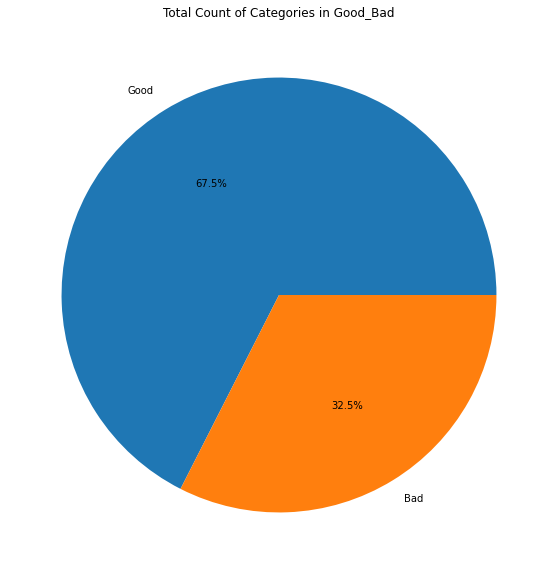

In [15]:
# Pie plot for Good_Bad
snsplots = SeabornPlots(df)

snsplots.PieChart("Total Count of Categories in Good_Bad",[df['Good_Bad'].value_counts().index,df['Good_Bad'].value_counts().values])

# It can be observed that there are 67.5% Good and 32.5% Bad

### As there are lots of categorical columns and most of these categorical columns have more than 10 categories.
### If any categorical column have more than 10 categories, than only top ten are getting selected for Visualization



MYSORE         488
CHENNAI I      451
VIJAYAWADA     446
INDORE         441
HYDERABAD      391
              ... 
GORAKHPUR        1
PROP             1
PROPRIETOR       1
DRIVER           1
7                1
Name: LOCATIONNAME, Length: 81, dtype: int64







MARUTI SUZUKI SWIFT VDI DIESEL 2009                 90
MARUTI SUZUKI SWIFT VDI DIESEL 2008                 76
MARUTI SUZUKI SWIFT VDI DIESEL 2012                 69
MARUTI SUZUKI SWIFT DZIRE VDI DIESEL 2009           66
MARUTI SUZUKI ERTIGA VDI DIESEL 2012                62
                                                    ..
TATA INDICA VISTA ZX QUADRAJET DIESEL 2012           1
AUDI A4 2.0 TDI 140BHP STANDARD DIESEL 2013          1
TATA INDICA EV2 LX DIESEL 2012                       1
TATA INDIGO LS DIESEL 2014                           1
RENAULT DUSTER 86 PS RXE DIESEL PLUS DIESEL 2014     1
Name: VEHICLEMODEL, Length: 2650, dtype: int64





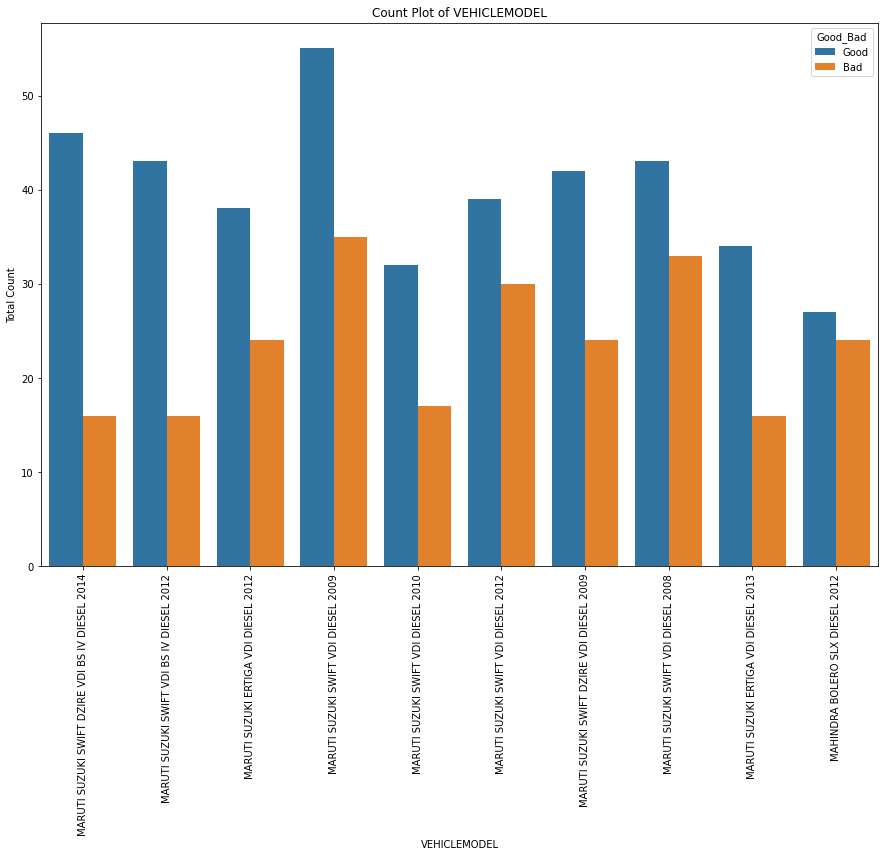



Y    9823
N      32
Name: ADDRESSCONFIRMED, dtype: int64





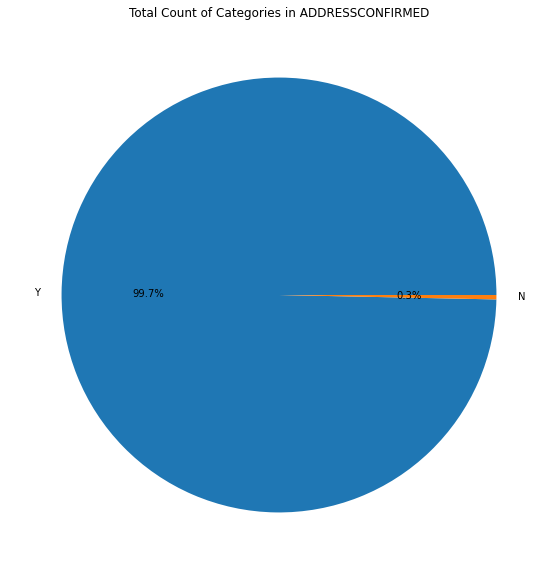



SELF                   2812
APPLICANT              2805
APPLICANT               899
SELF                    185
PROPRIETOR              161
                       ... 
BORROWERS                 1
ASHOK MEDHE               1
MARRIED INDIVIDUAL        1
HIRER                     1
APLI                      1
Name: DESIGNATION, Length: 613, dtype: int64





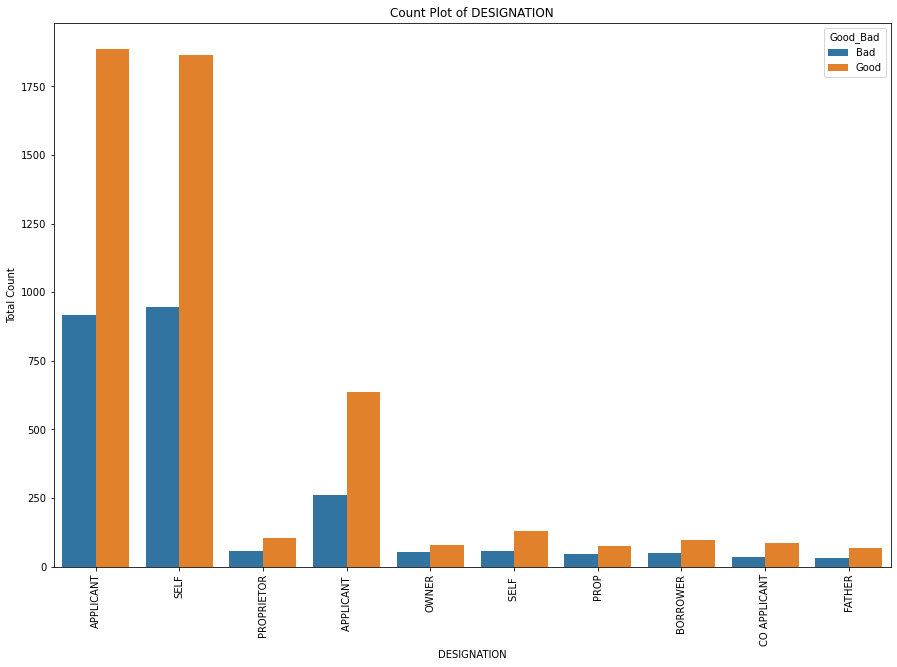



O    8310
R    1293
L     155
Name: RESIDENCETYPE, dtype: int64





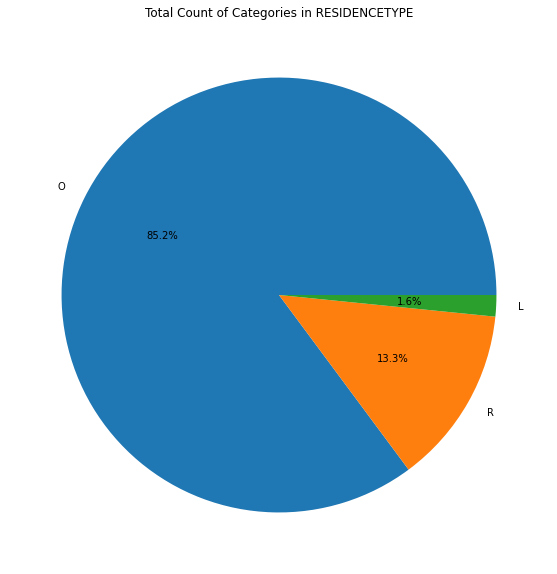

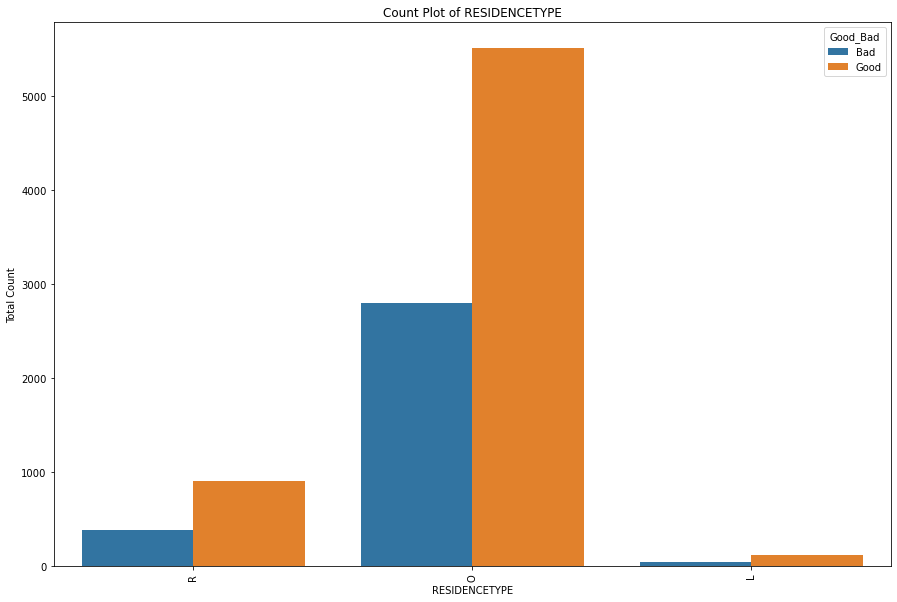



PR005    5218
PR006    1264
PR002    1025
PR007     737
PR001     427
PR004     263
PR003     262
PR008     205
PR009     142
PR018      93
PRO20      75
0          33
PRO19      10
PR010       8
PR012       6
PR016       3
PR017       2
PR013       2
PR014       1
PR011       1
Name: BUSINESSCATEGORY, dtype: int64





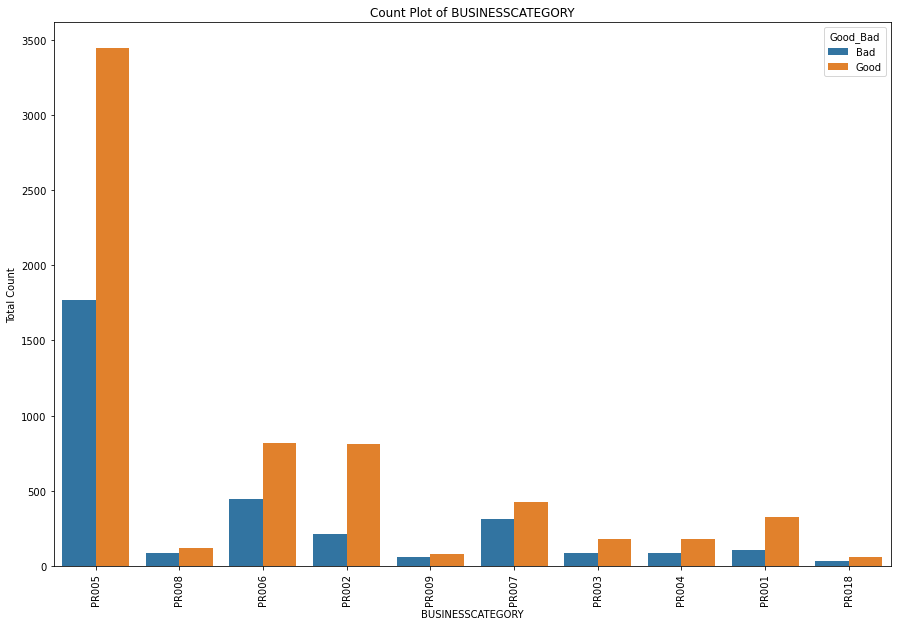



Y    6345
N    3510
0      38
Name: STABILITYCONFIRMED, dtype: int64





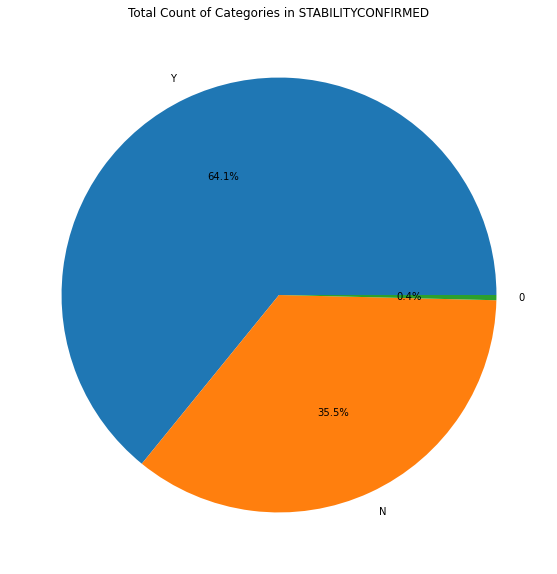

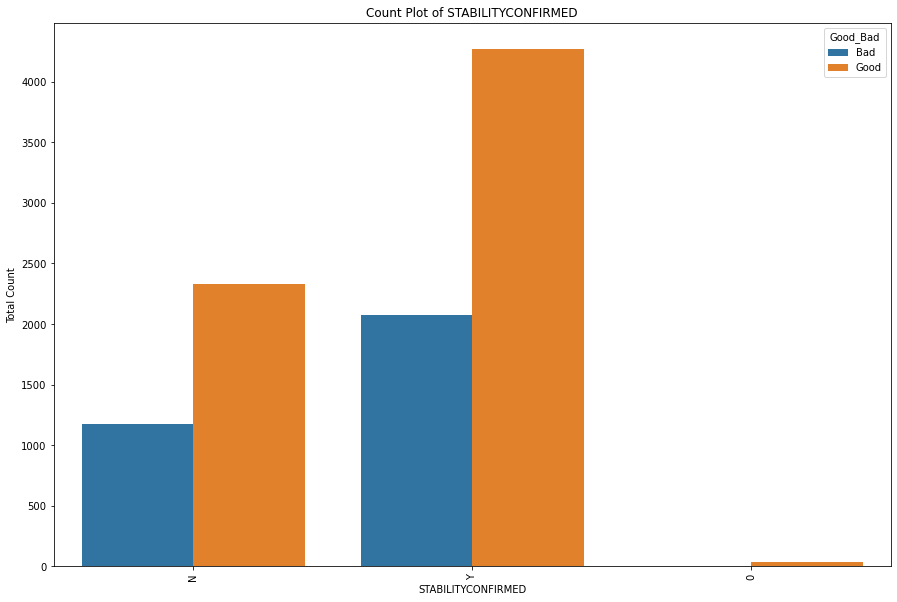



N      7361
Y      2494
WEB      18
0        17
Name: ISFAMILYINVOLVED, dtype: int64





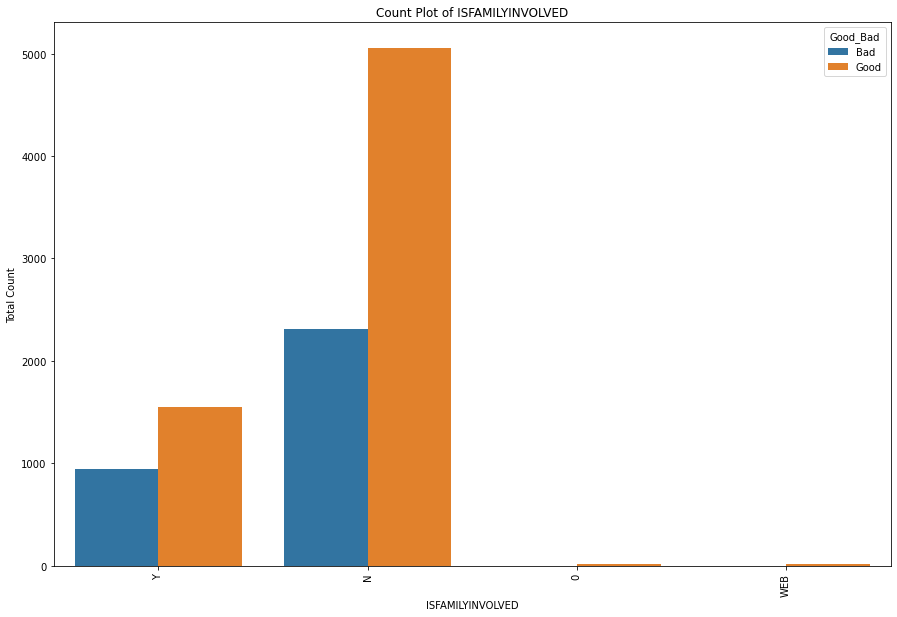



O    6293
R    2872
L     573
Y      20
0      17
N       1
Name: OFFICETYPE, dtype: int64





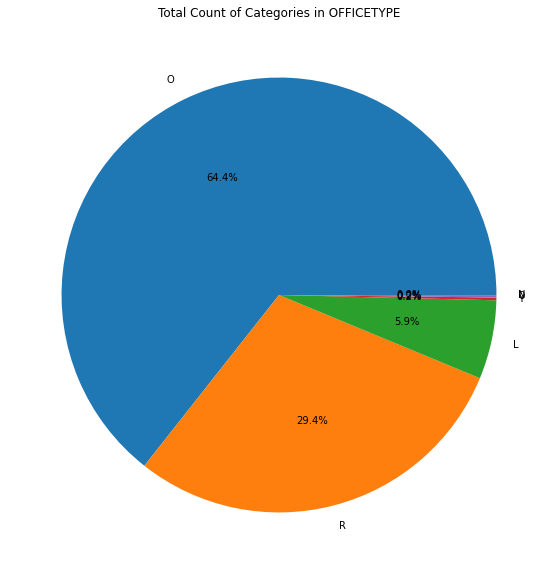



0      8132
20      293
40      179
30      173
100     157
50      127
25      106
35       91
10       85
15       77
60       65
80       37
70       35
45       34
75       26
1        25
65       25
8        24
85       23
12       18
5        16
11       16
90       13
55       13
18        8
6         7
WEB       7
9         6
2         6
22        5
4         4
14        4
17        4
34        3
28        3
36        3
7         3
54        3
38        3
13        3
24        3
33        3
95        2
16        2
3         2
48        1
MOB       1
83        1
59        1
52        1
58        1
23        1
219       1
26        1
77        1
37        1
56        1
27        1
Name: BUSINESSMARGINNET, dtype: int64





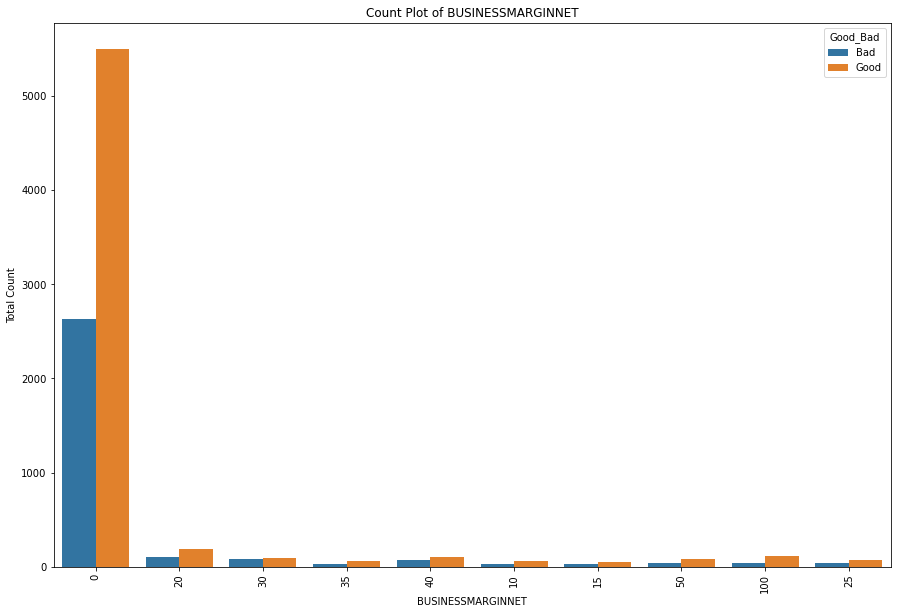



0       3070
1       1908
2       1557
3        709
5        575
        ... 
32         1
49         1
43         1
62         1
3500       1
Name: NOOFEMPLOYEES, Length: 76, dtype: int64





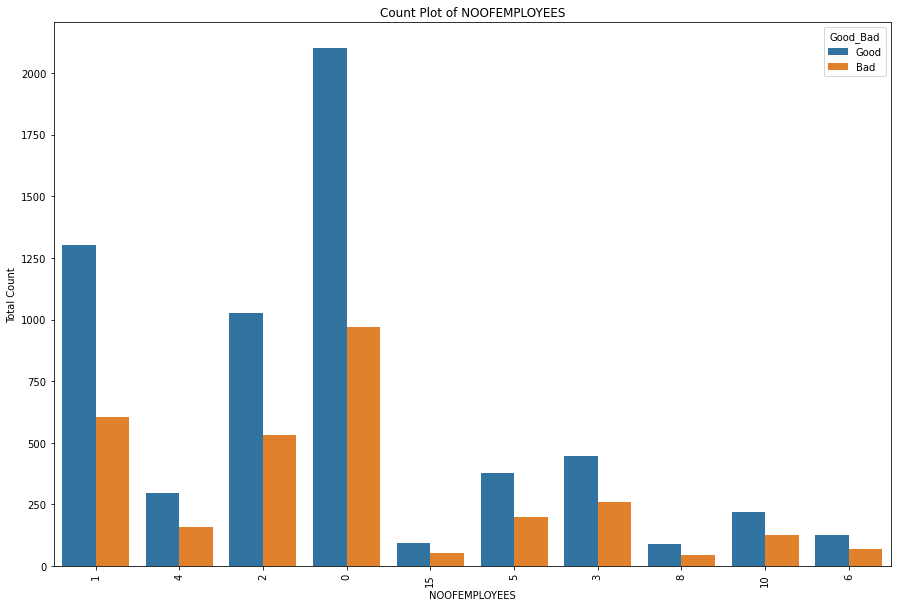



Y              6254
N              3606
50000             3
20000             2
13000             1
79.1015345        1
78.52777827       1
100000            1
0                 1
15000             1
26742             1
40000             1
18000             1
Name: NAMEBOARDSEEN, dtype: int64







1                                                                                                                  4983
2                                                                                                                  4756
0                                                                                                                     4
30000                                                                                                                 2
20000                                                                                                                 2
40000                                                                                                                 2
70000                                                                                                                 1
Jail Khana Street, Mittoor, Chittoor, Andhra Pradesh 517001, India                                                    1
25000                                 

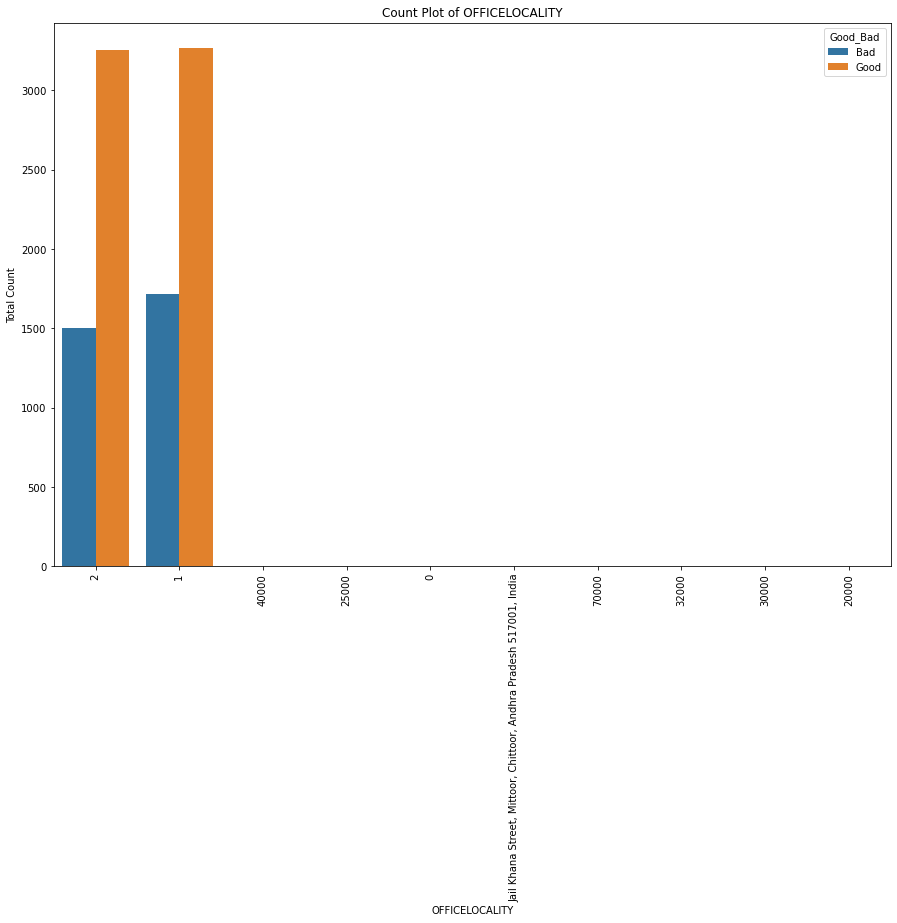



N        6562
Y        3241
30000       3
54          1
15000       1
0           1
32          1
49          1
34          1
6           1
18          1
58          1
42          1
60          1
29          1
50000       1
45          1
Name: ISRESIDENCECOMEOFFICE, dtype: int64







APPLICANT                         1221
PERSONAL                           625
PERSONAL USE                       551
APPLICANT                          448
SELF                               349
                                  ... 
PURCHASE OF USED CAR ERTIGA          1
APPLICAT AND CO-APPLICANT BOTH       1
FOR BUSINESS PURPOSES                1
HYUNDAI VERNA                        1
RE FINANCE REQ ON INNOVA             1
Name: ENDUSEOFLOAN, Length: 1987, dtype: int64





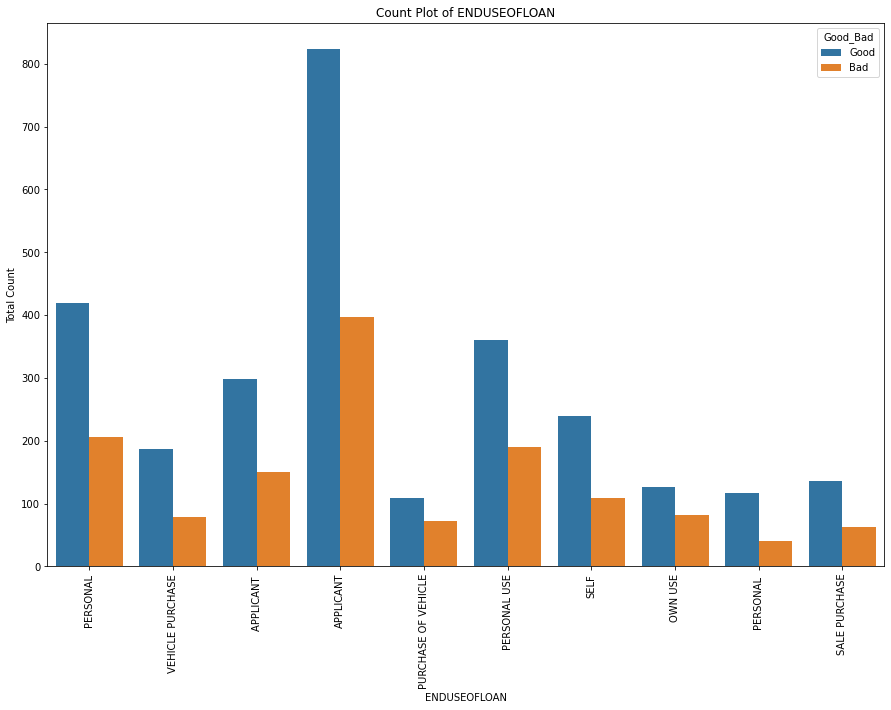



CHENNAI           332
HYDERABAD         216
INDORE            209
VIZAG             149
PUNE              138
                 ... 
KALIYAKAVIZHAI      1
CHENGALPATTU        1
KRISHNAGAR          1
TIRUPPATTUR         1
THANUKU             1
Name: ASSETLOCATION, Length: 2246, dtype: int64







POSITIVE    9829
NEGATIVE      26
Name: NEIGHBOURREF, dtype: int64





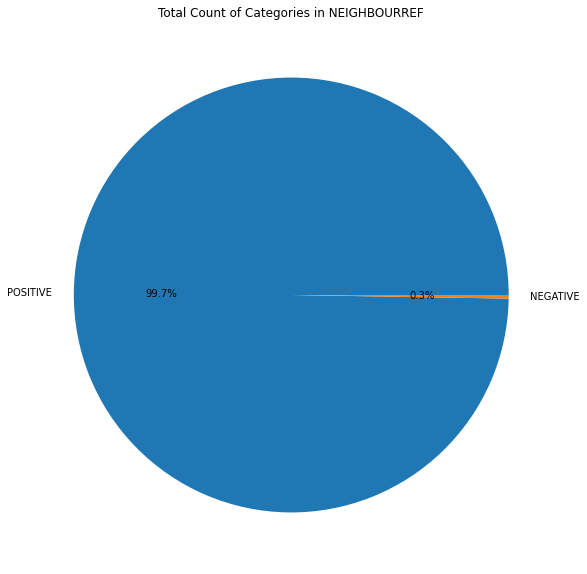

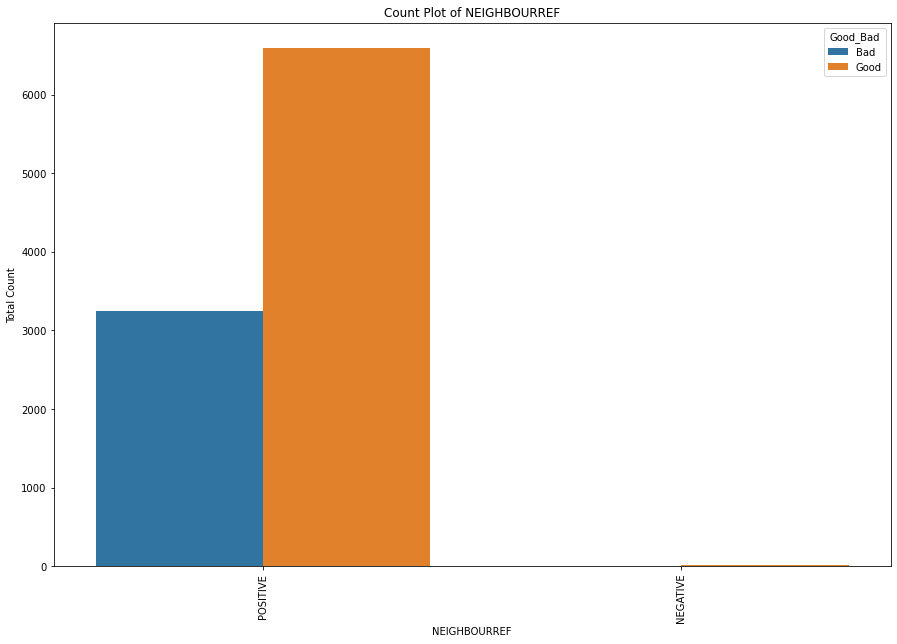



N    9674
Y     127
Name: POLITICALLINK, dtype: int64





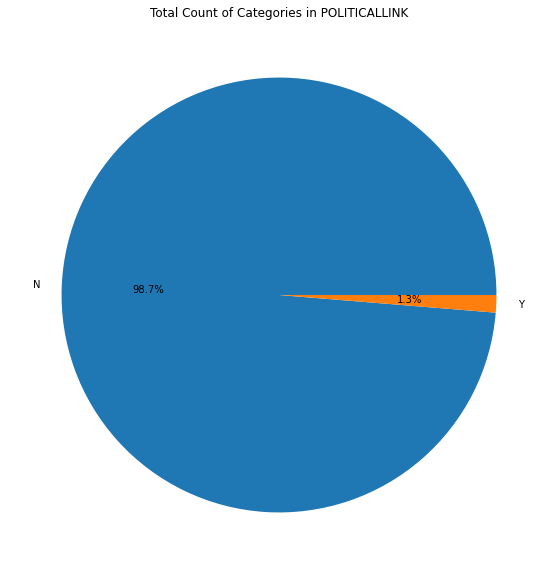

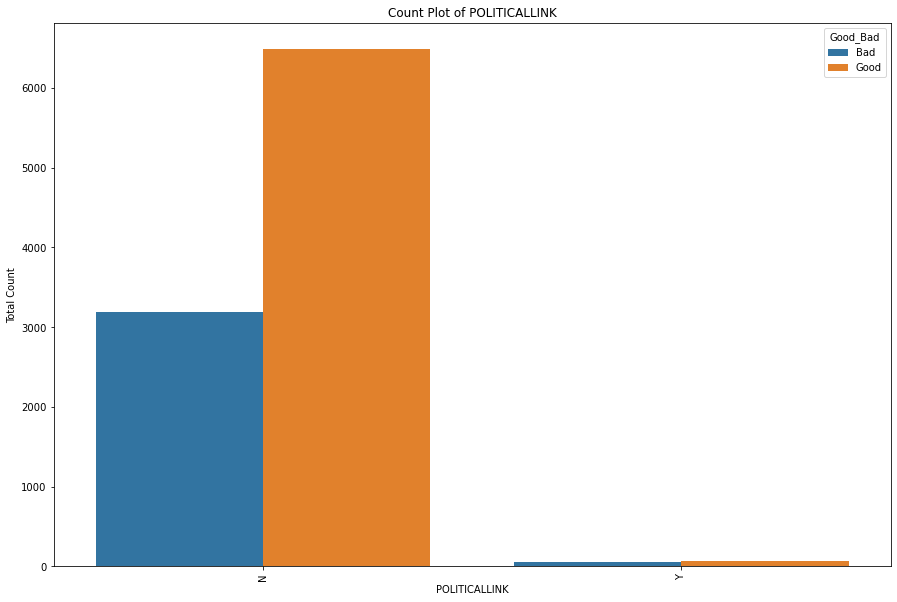



SEP    7000
SAL    1449
AGR    1085
OTH     133
PEN      62
STU       6
Name: PROFESSIONTYPE, dtype: int64





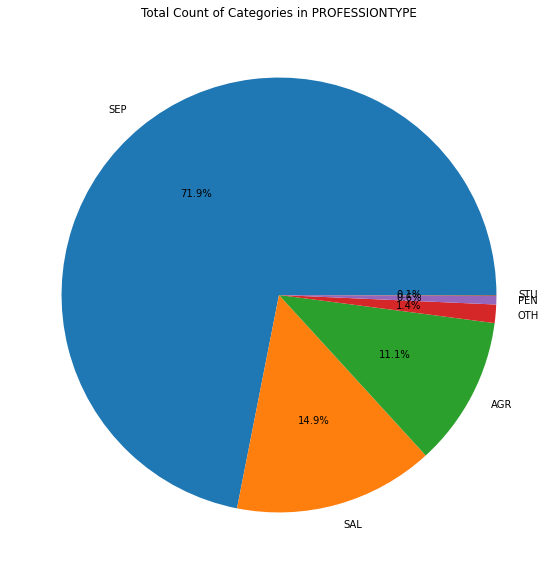

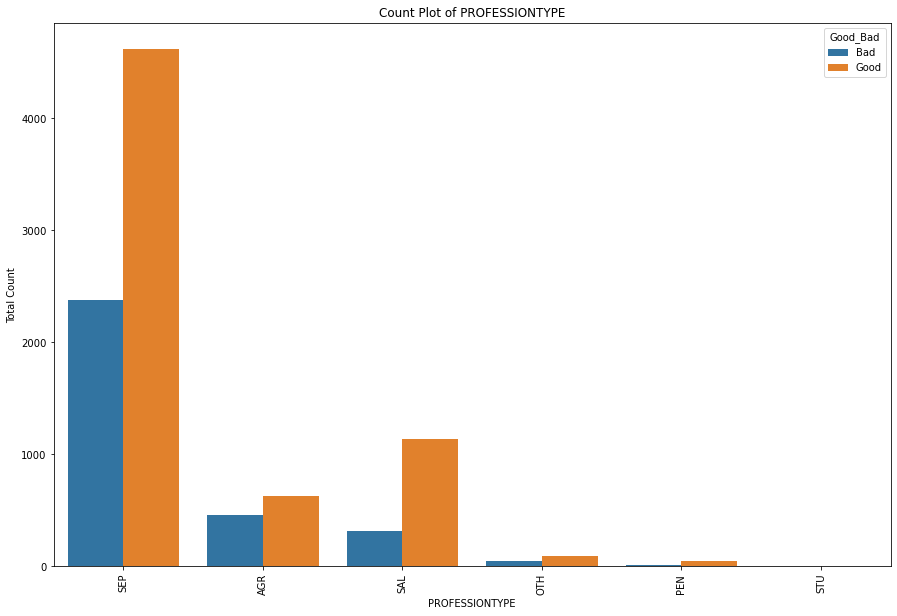



PROPRIETOR                     1242
PROPREITOR                     1203
PROP                            795
OWNER                           617
PROPRIETOR                      417
                               ... 
CASHIER CUM MANAGER               1
TELEPHONE MECHANIC                1
SLEF                              1
SCIENTIFIC BUSINESS OFFICER       1
FARMER AND PROPERTY BROKER        1
Name: APPLICANTDESIGNATION, Length: 1939, dtype: int64





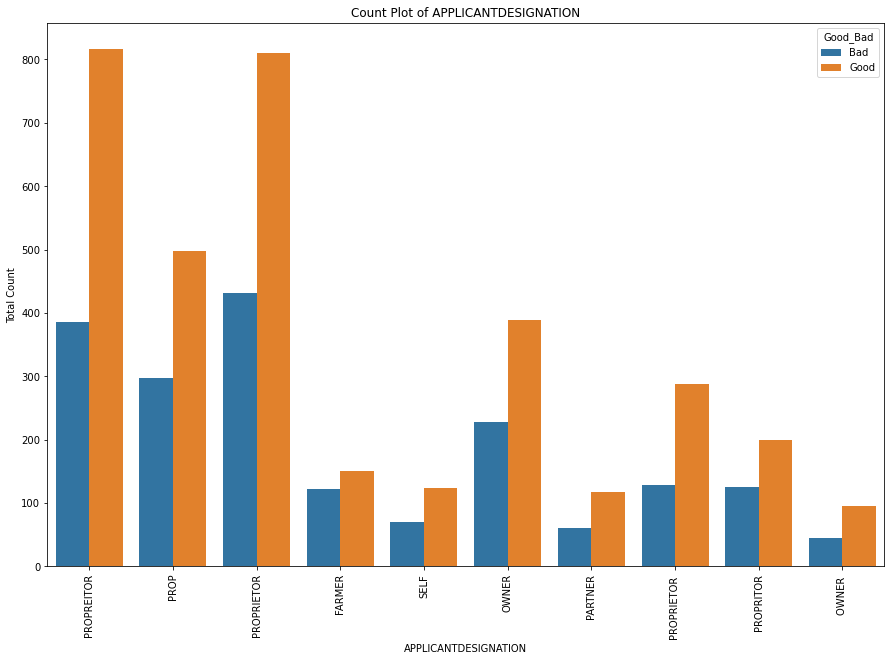



Y    9662
N     176
Name: IMGCONFIRM, dtype: int64





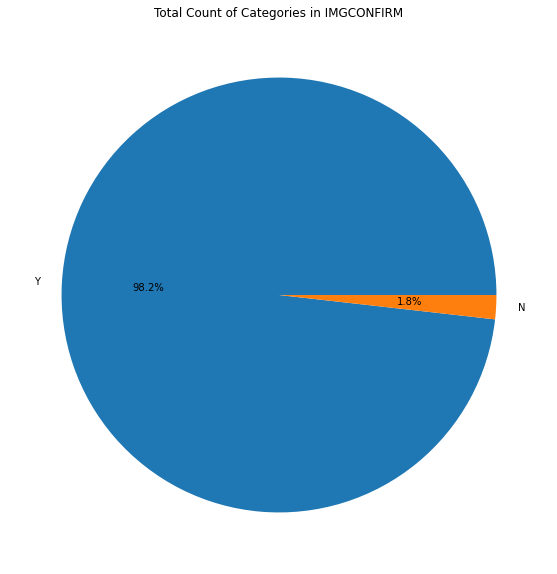

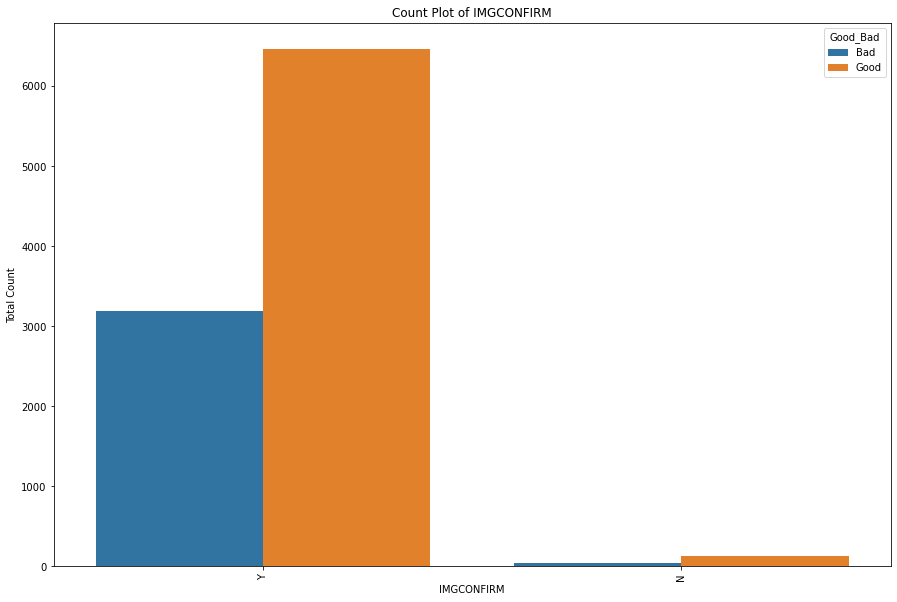

In [16]:
Categorical_columns.remove('Good_Bad')
for i in Categorical_columns:
    print("\n")
    temp = TotalCounts(df[i])
    print(temp)
    print("\n\n")
    try:
        if len(temp)>10:
            df_temp = FilterTableTop(df,i,10)
            sns_temp = SeabornPlots(df_temp)
            sns_temp.CountPlotChart([i,'Good_Bad'],90)
        else:
            snsplots.PieChart("Total Count of Categories in "+i,[df[i].value_counts().index,df[i].value_counts().values])
            snsplots.CountPlotChart([i,'Good_Bad'],90)
    except:
        print("Could not produce Plot "+i)

In [17]:
z = TotalCounts(df['BUSINESSMARGINNET'])
print(len(z))

58


### Continious Columns

### a) Numeric Analysis:

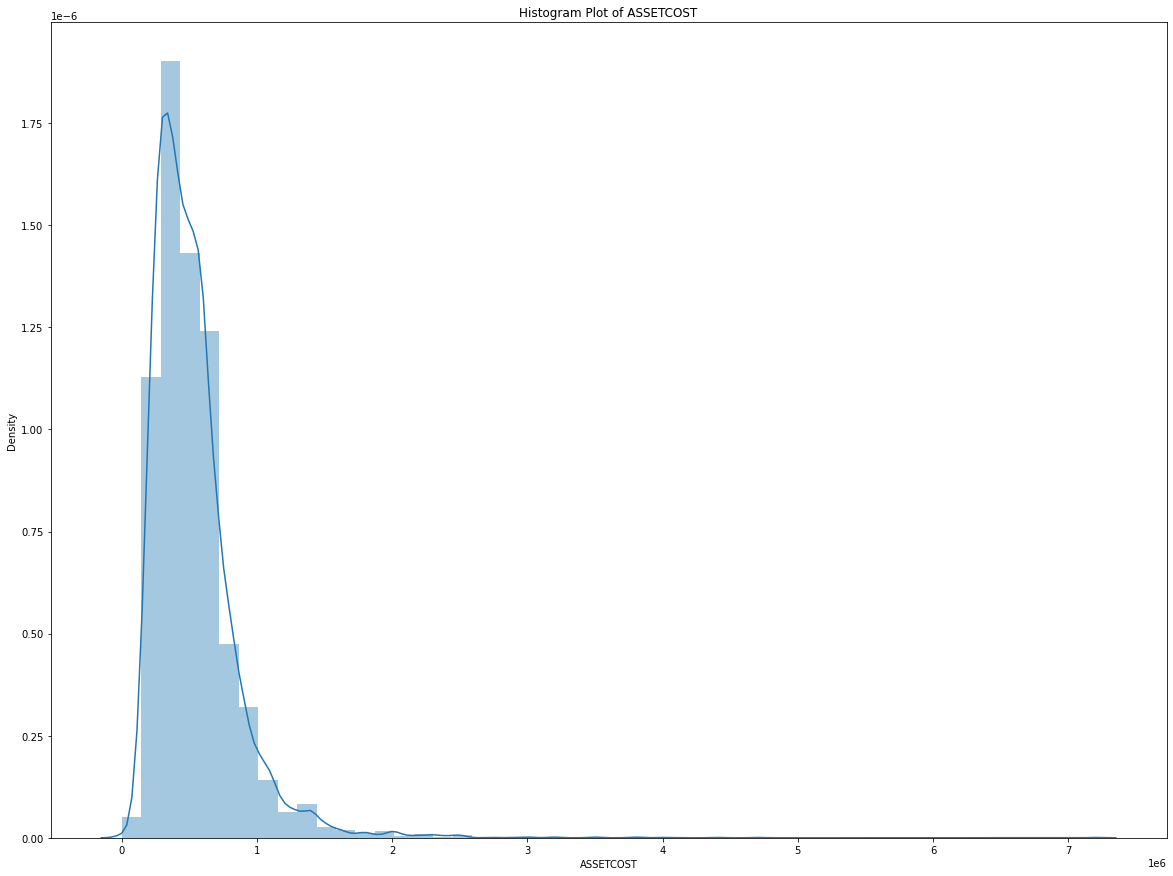

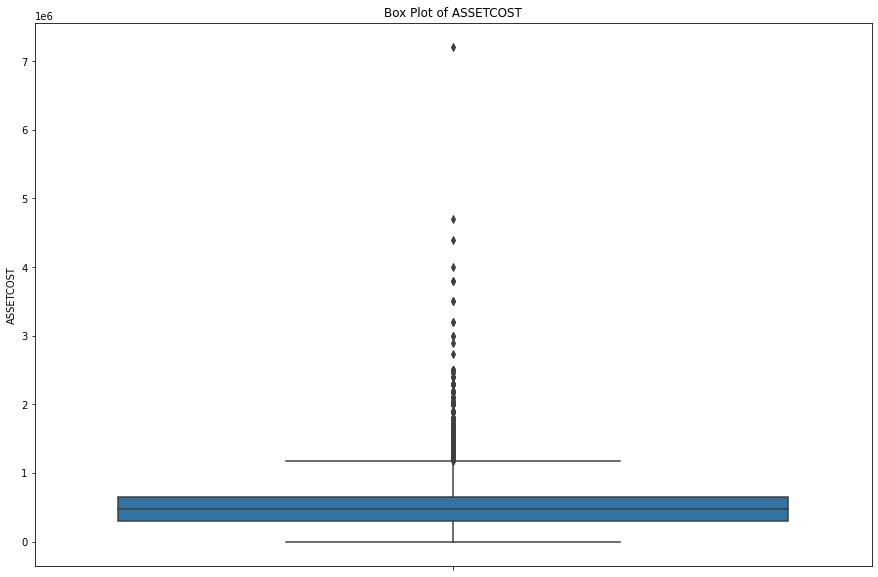

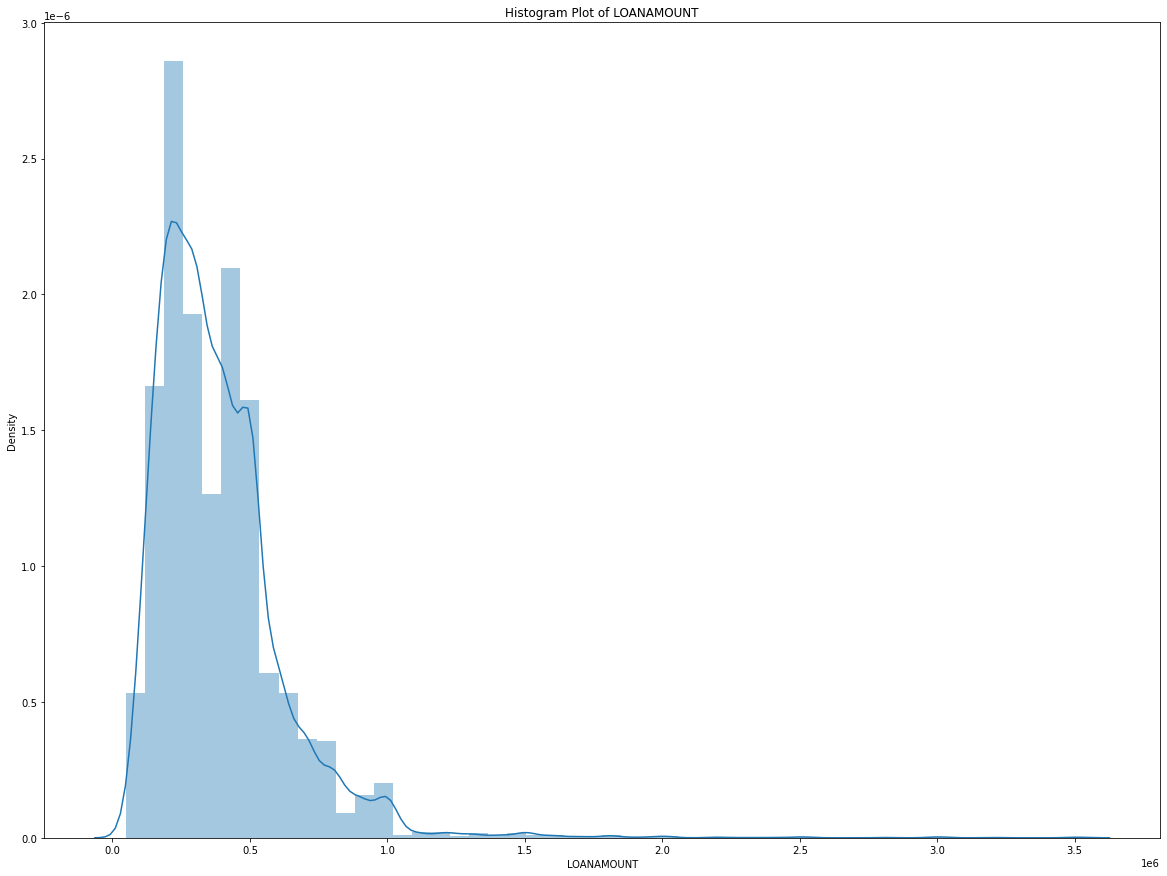

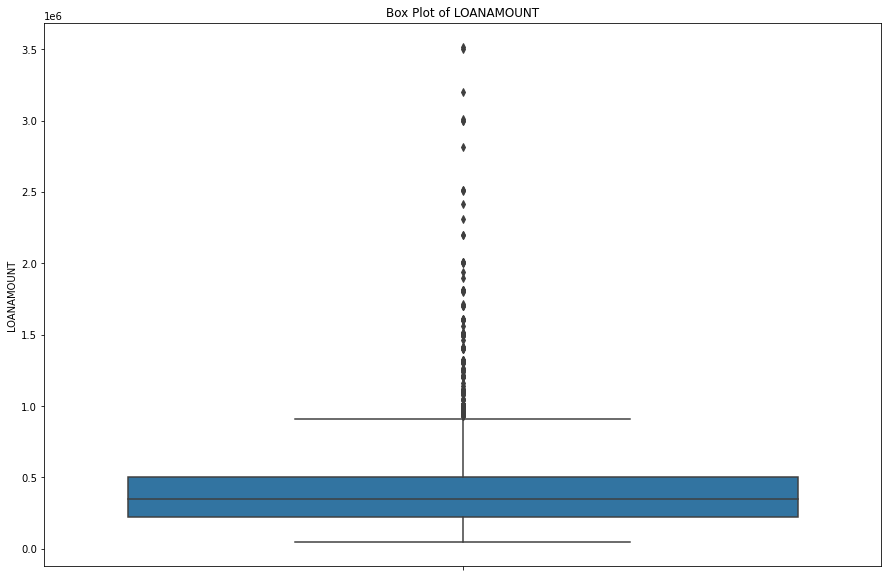

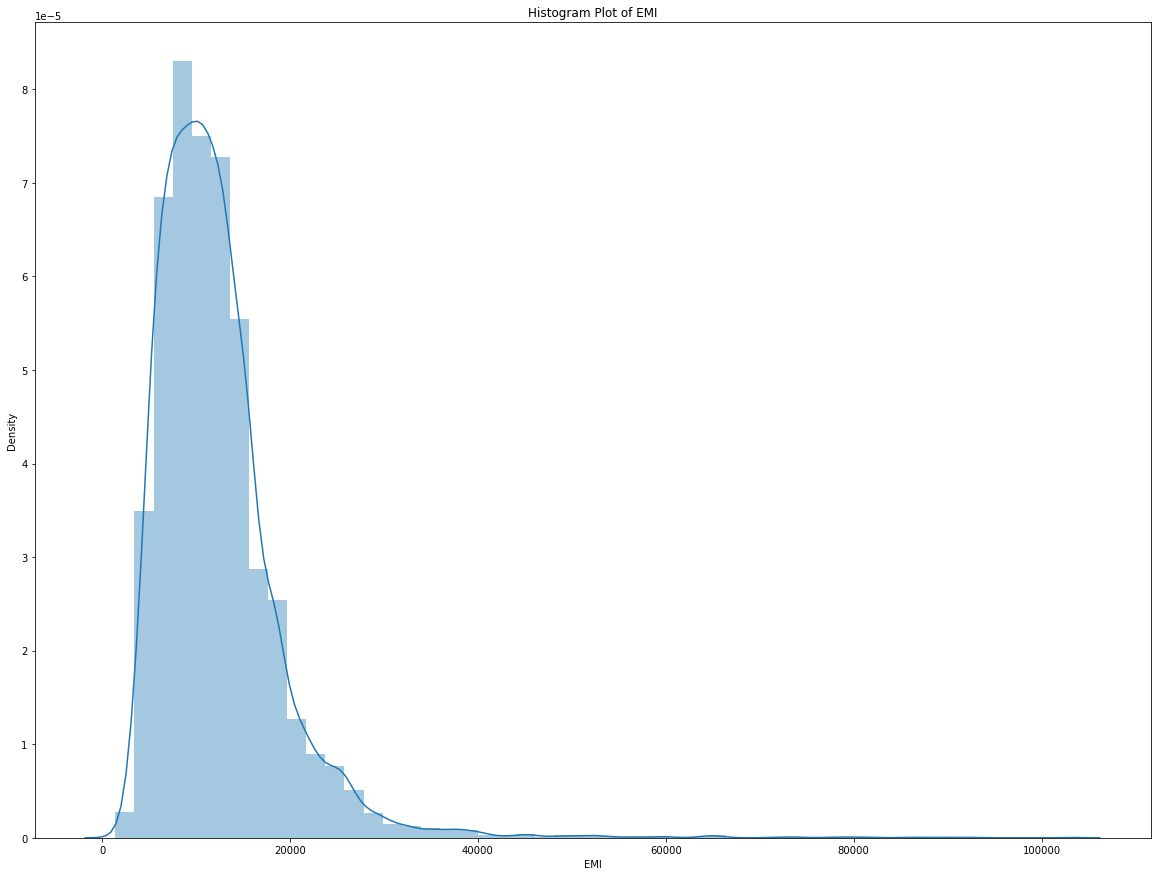

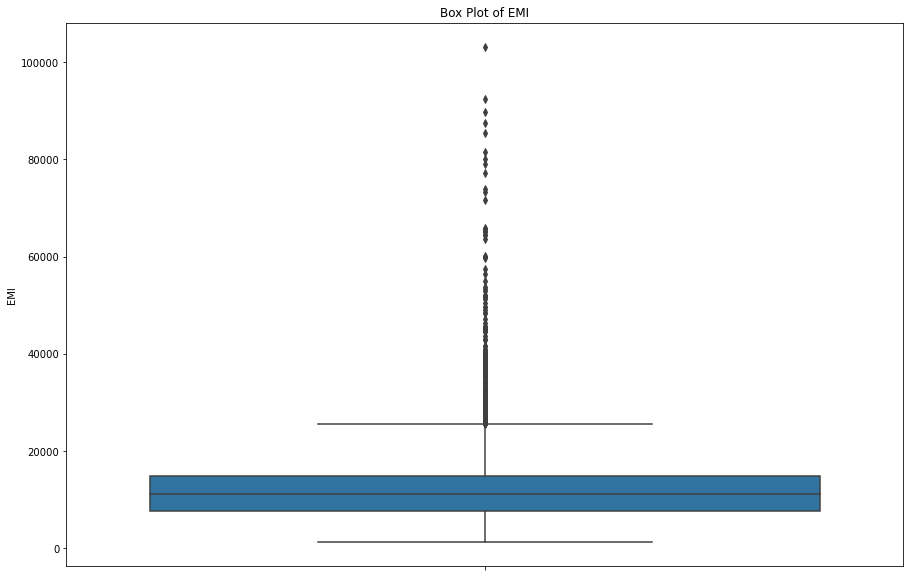

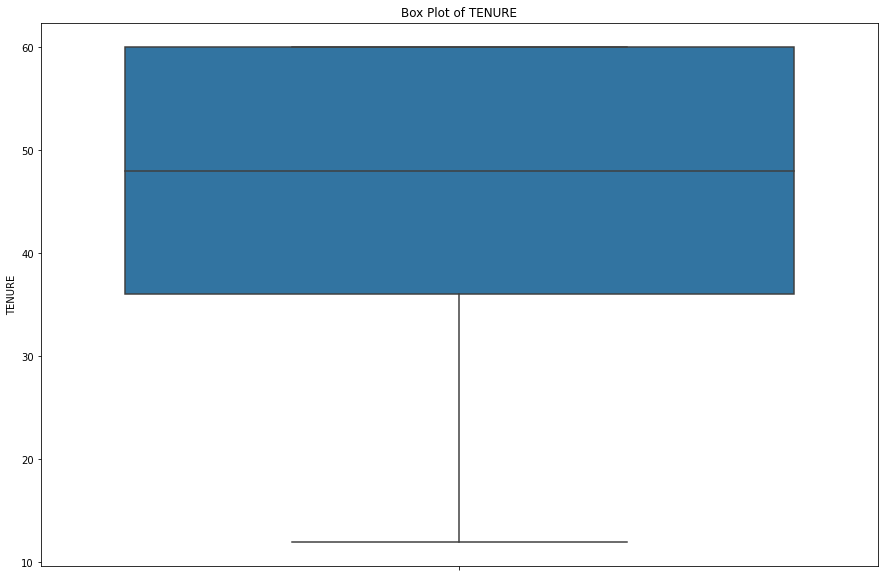

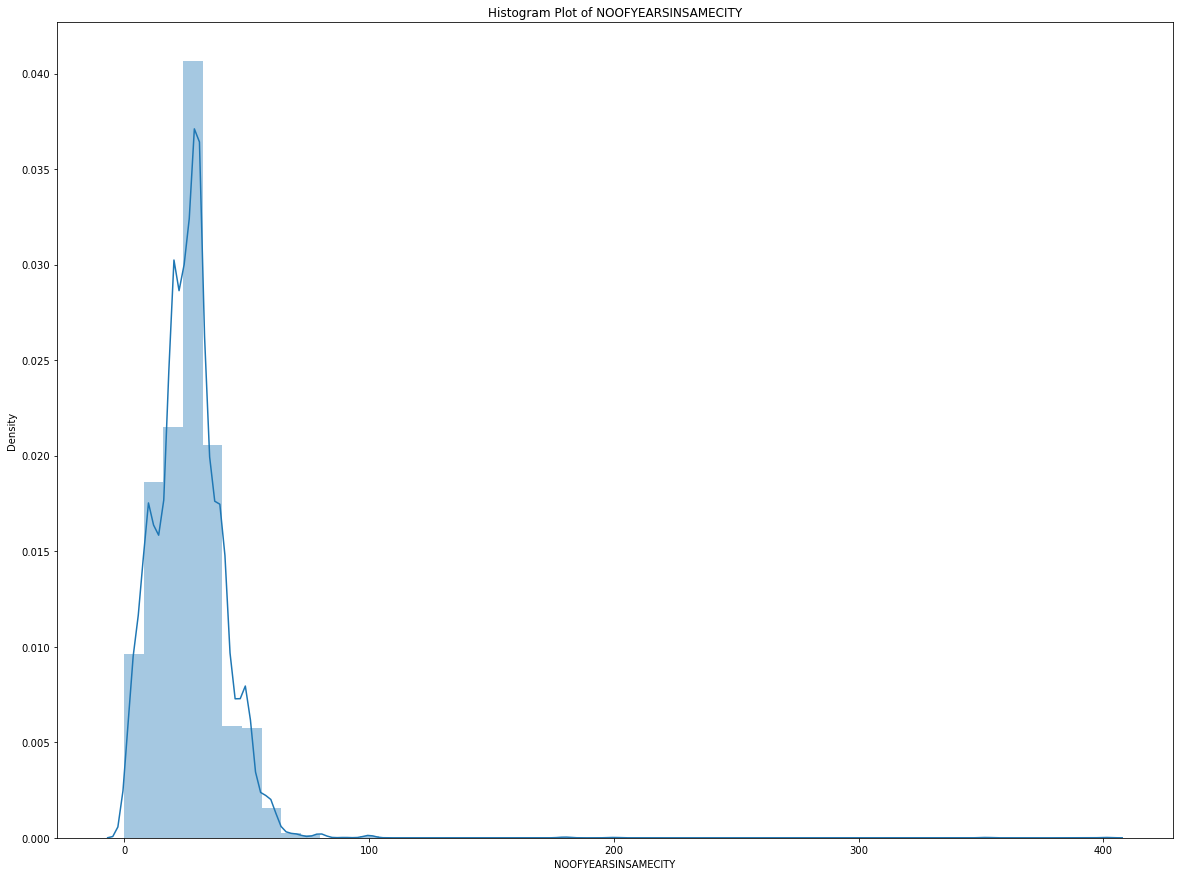

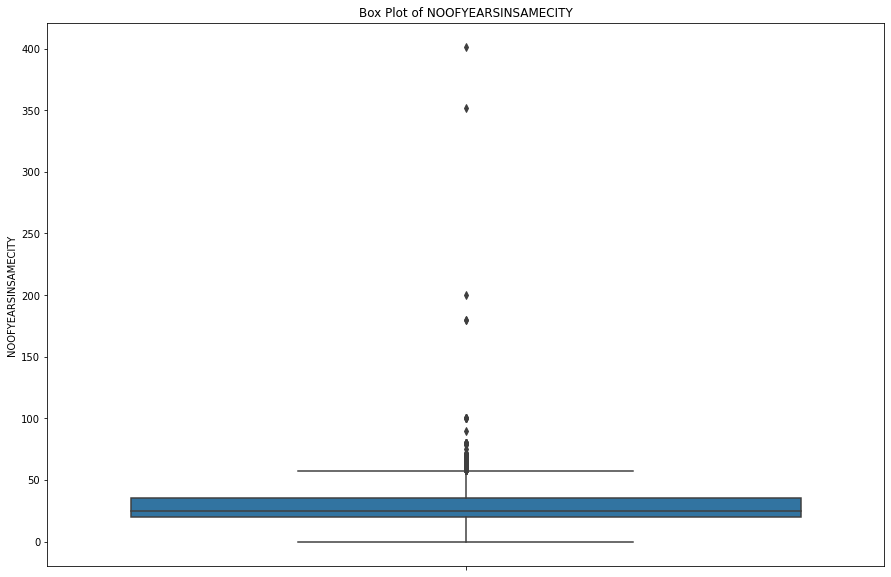

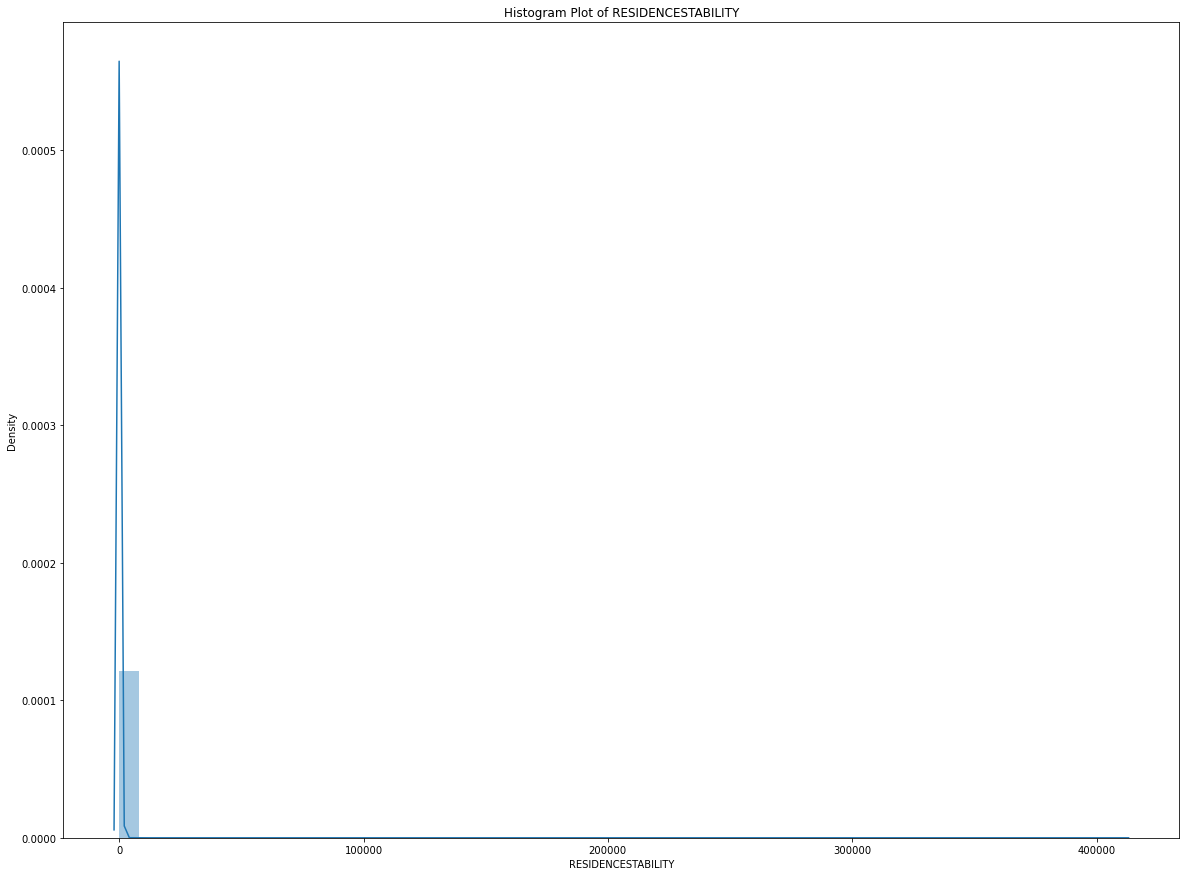

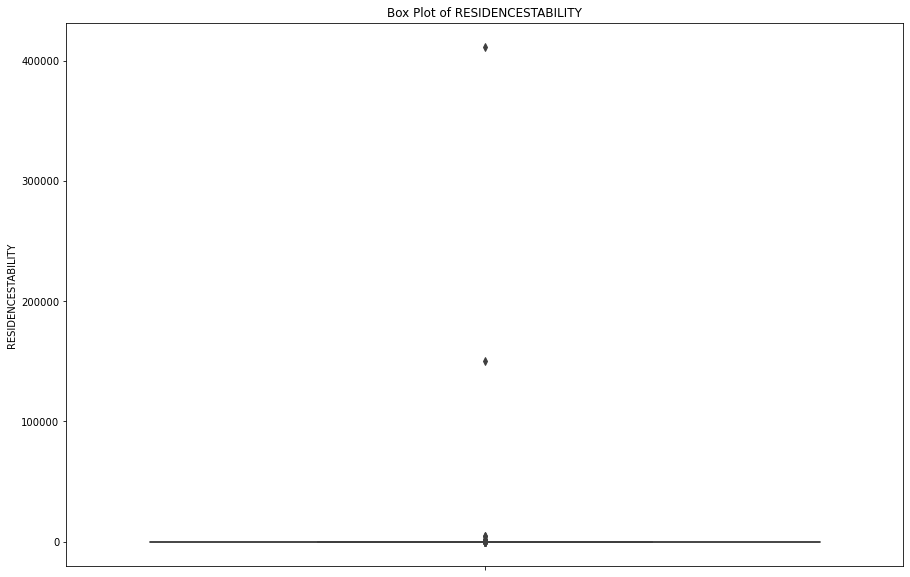

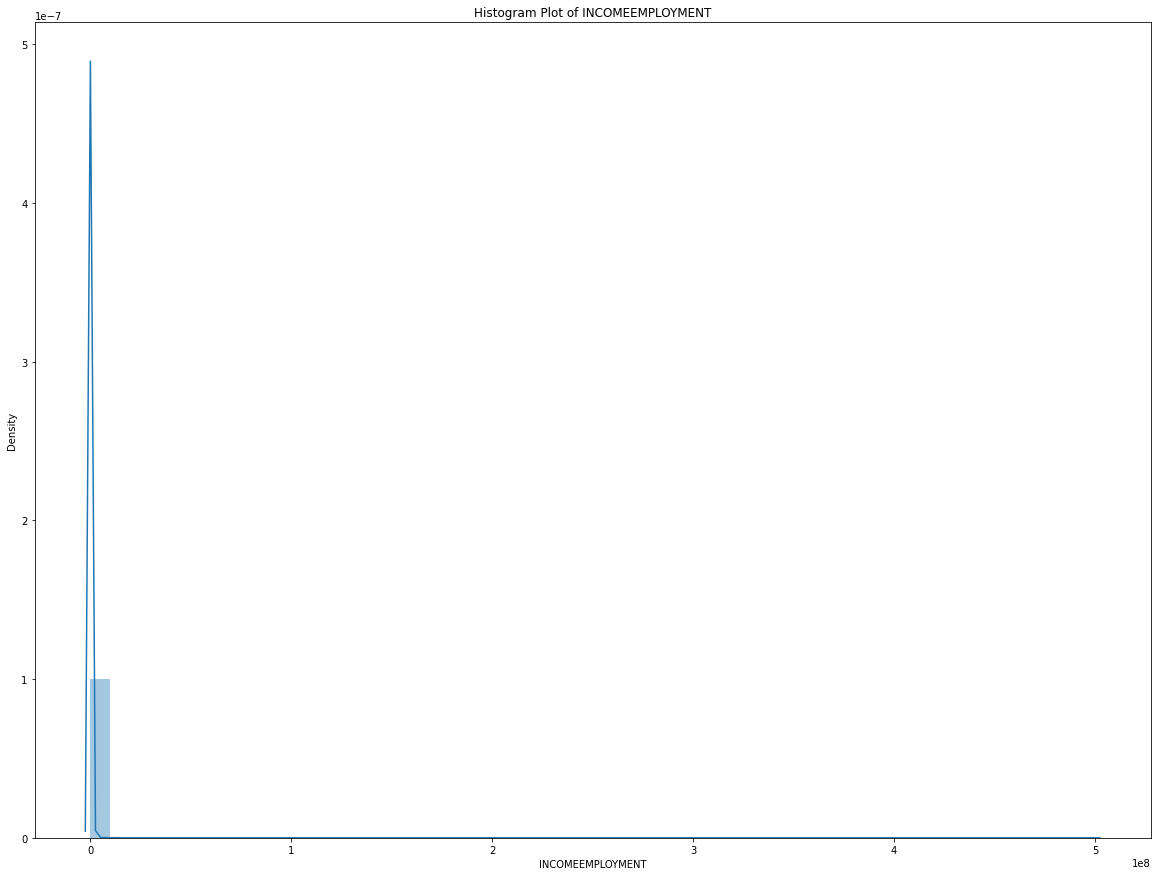

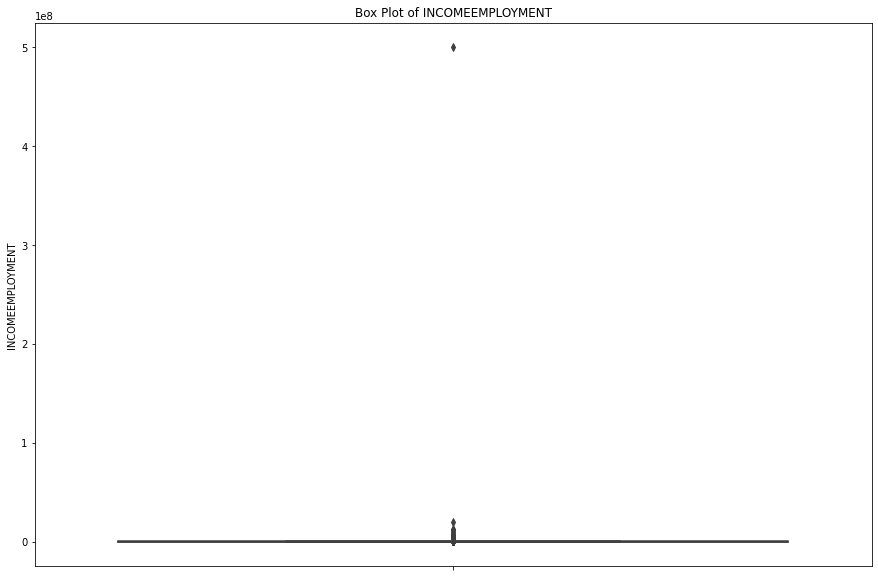

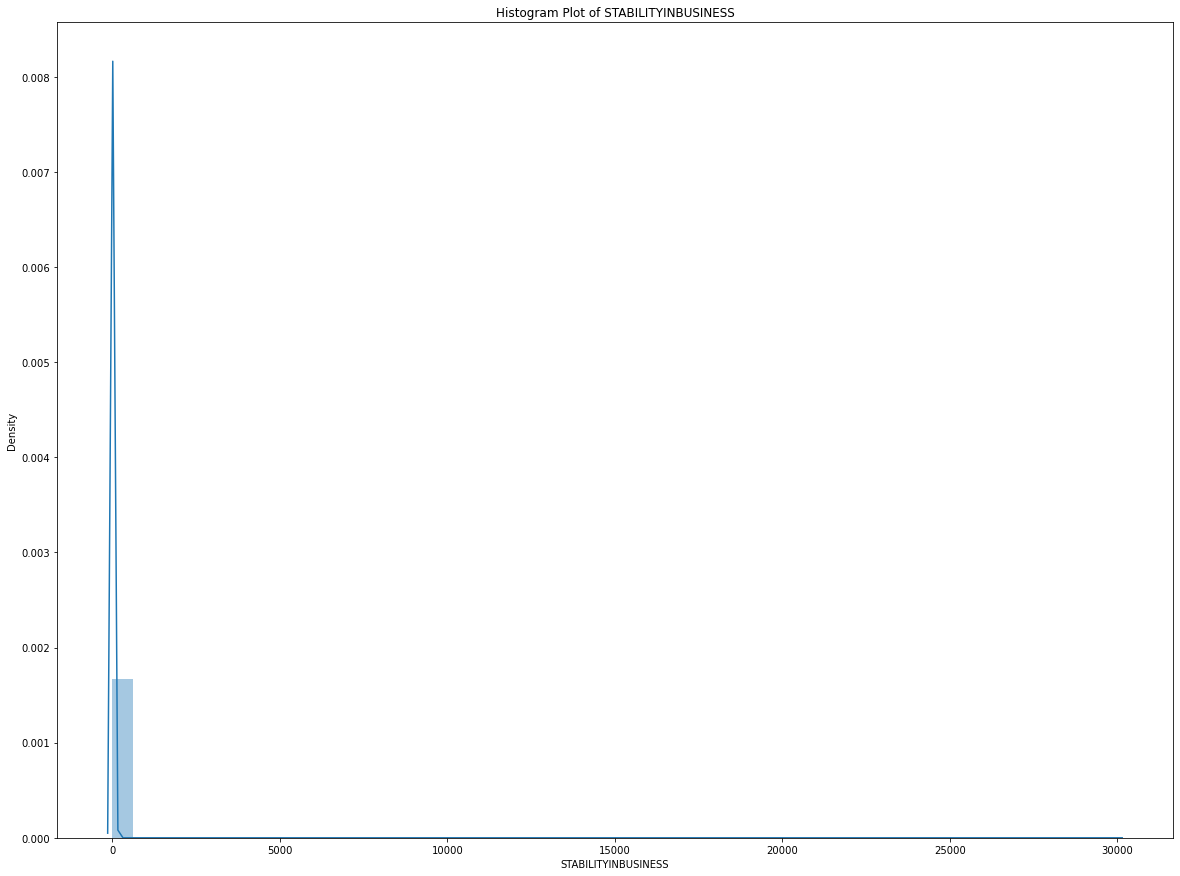

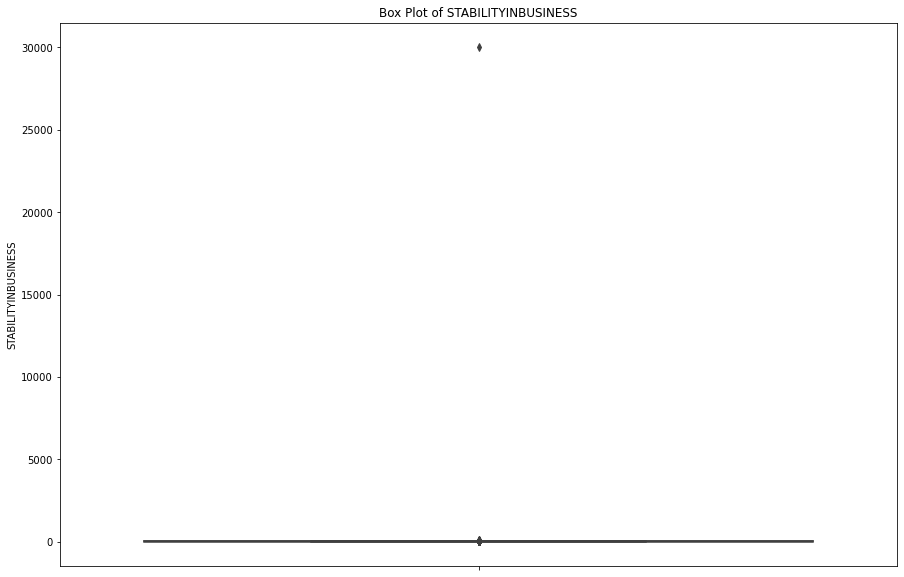

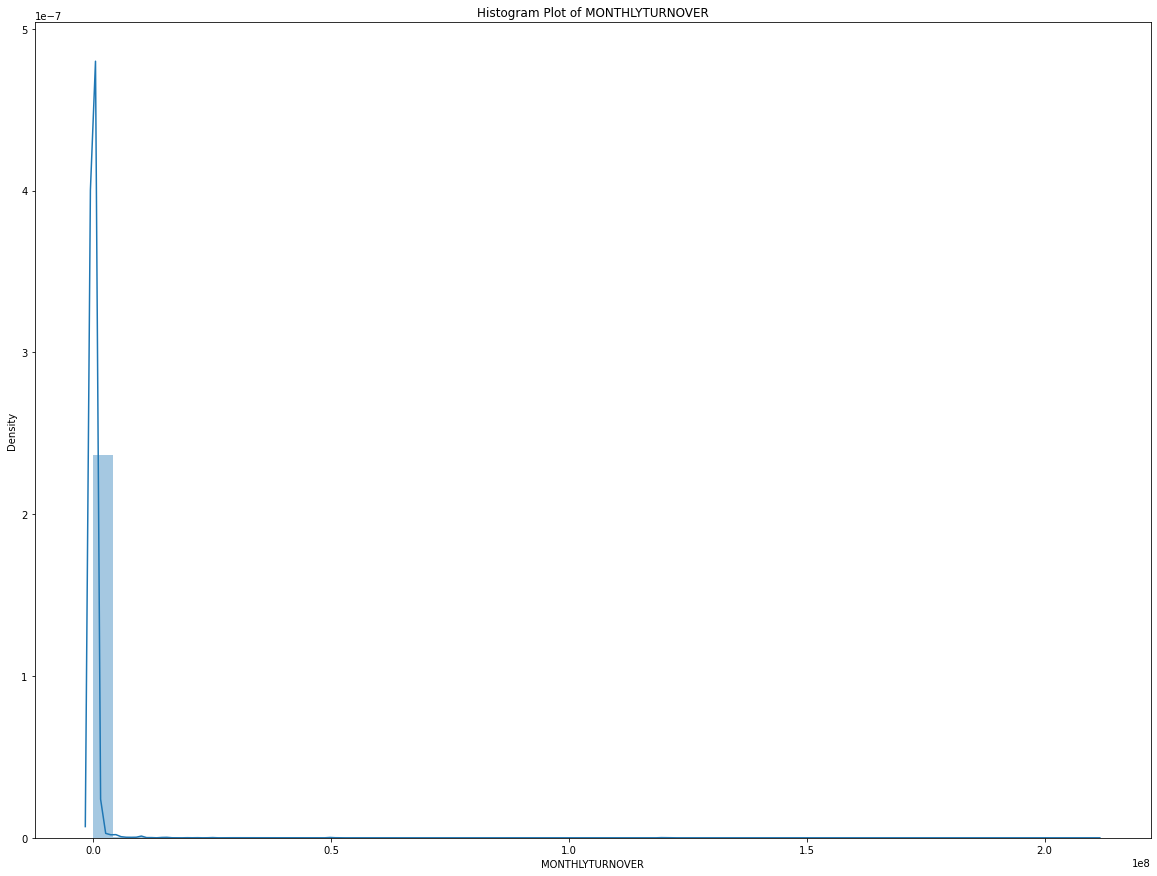

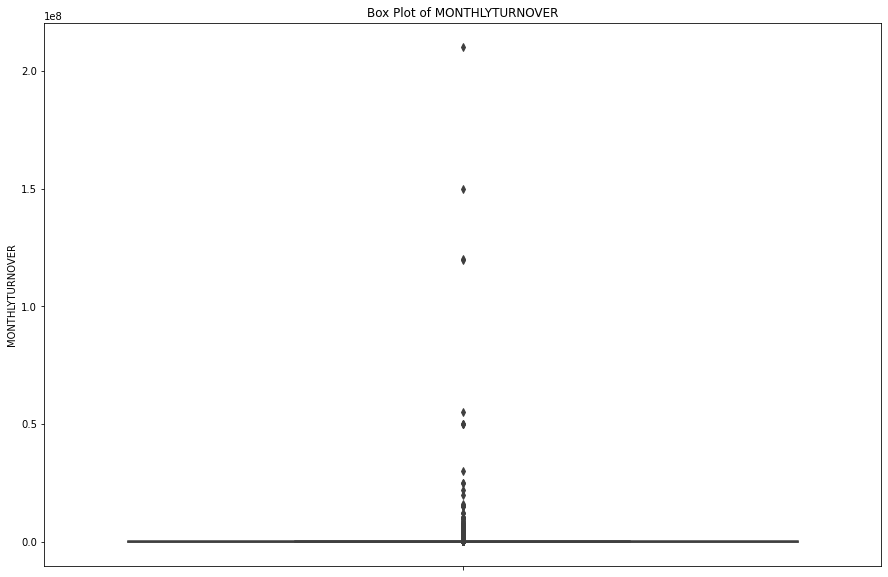

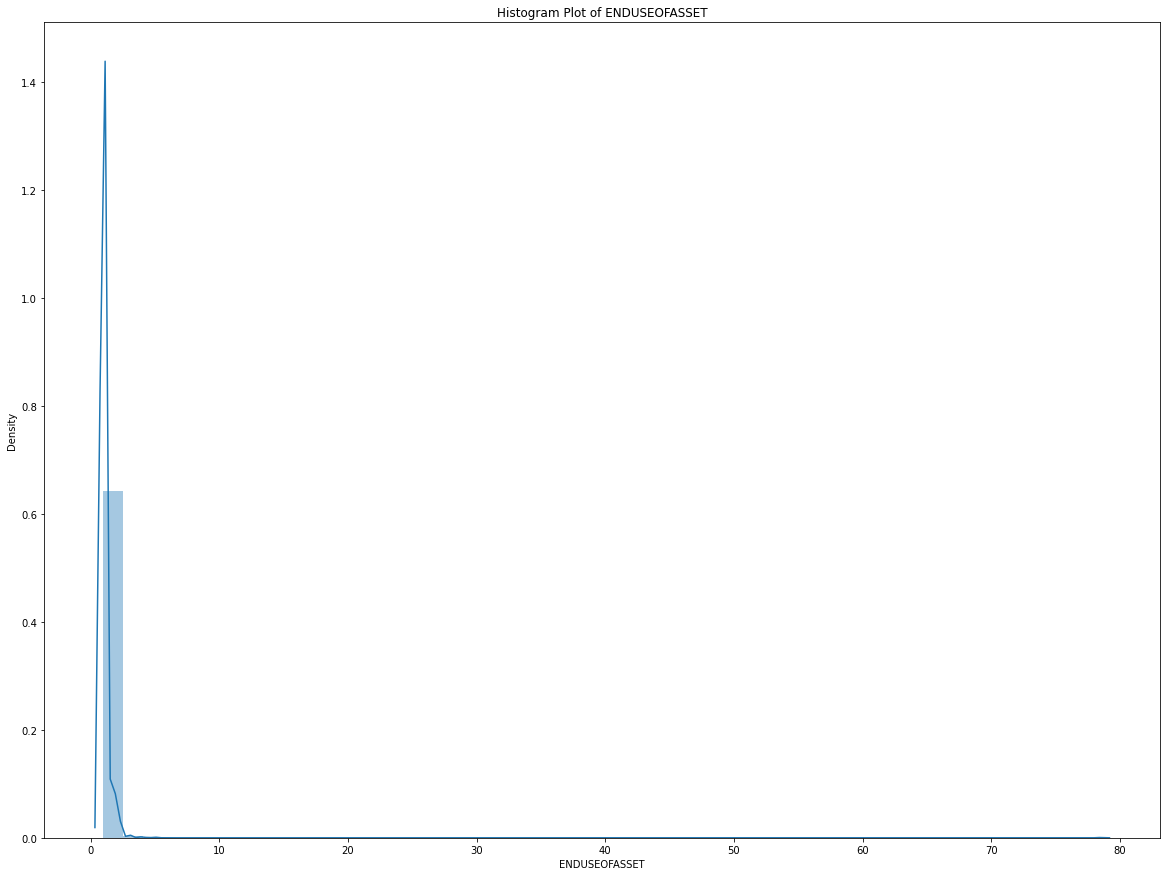

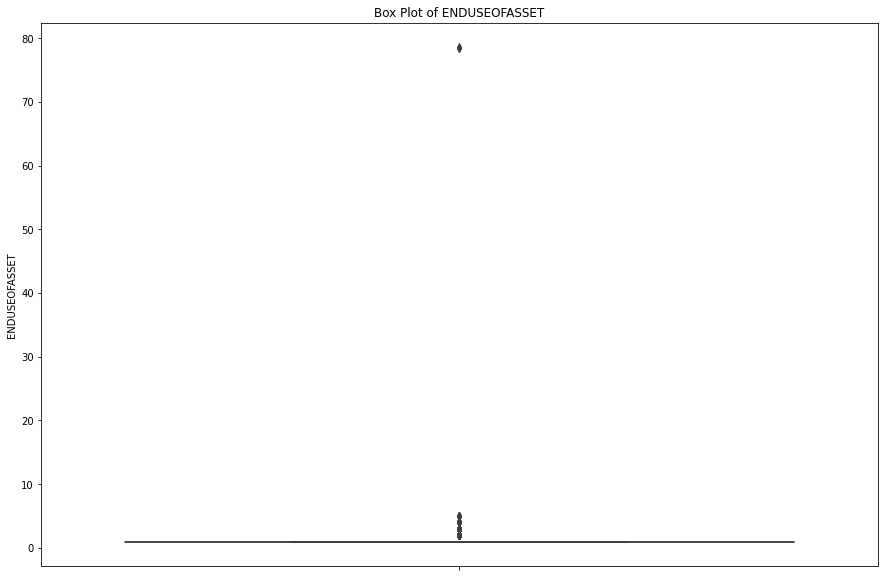

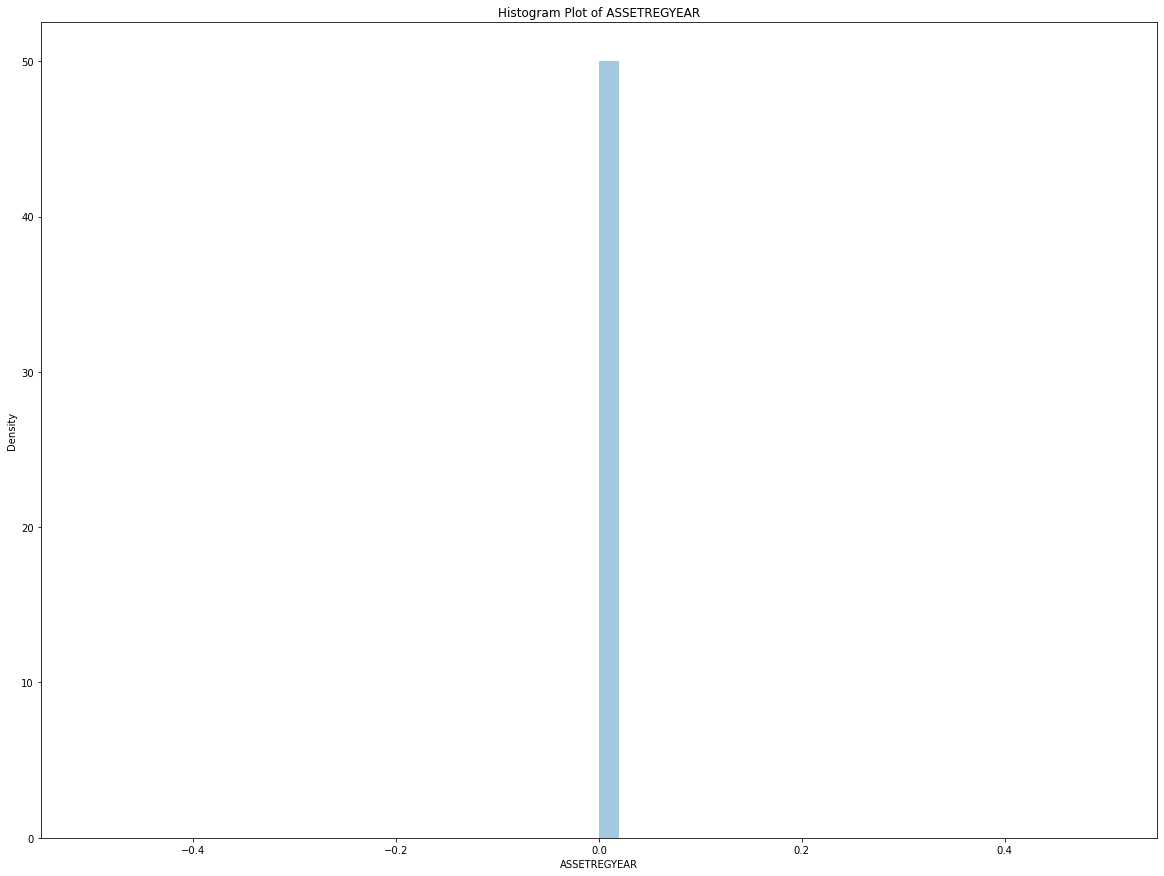

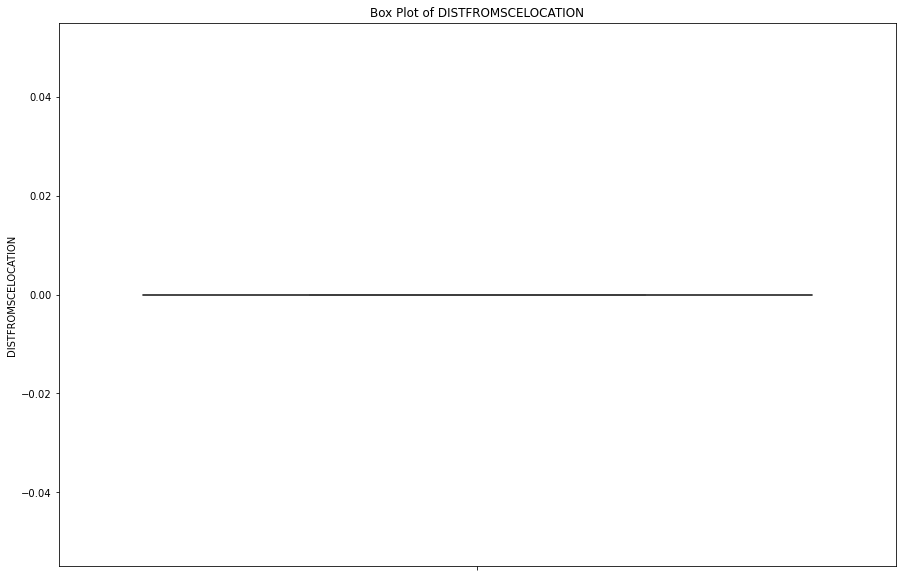

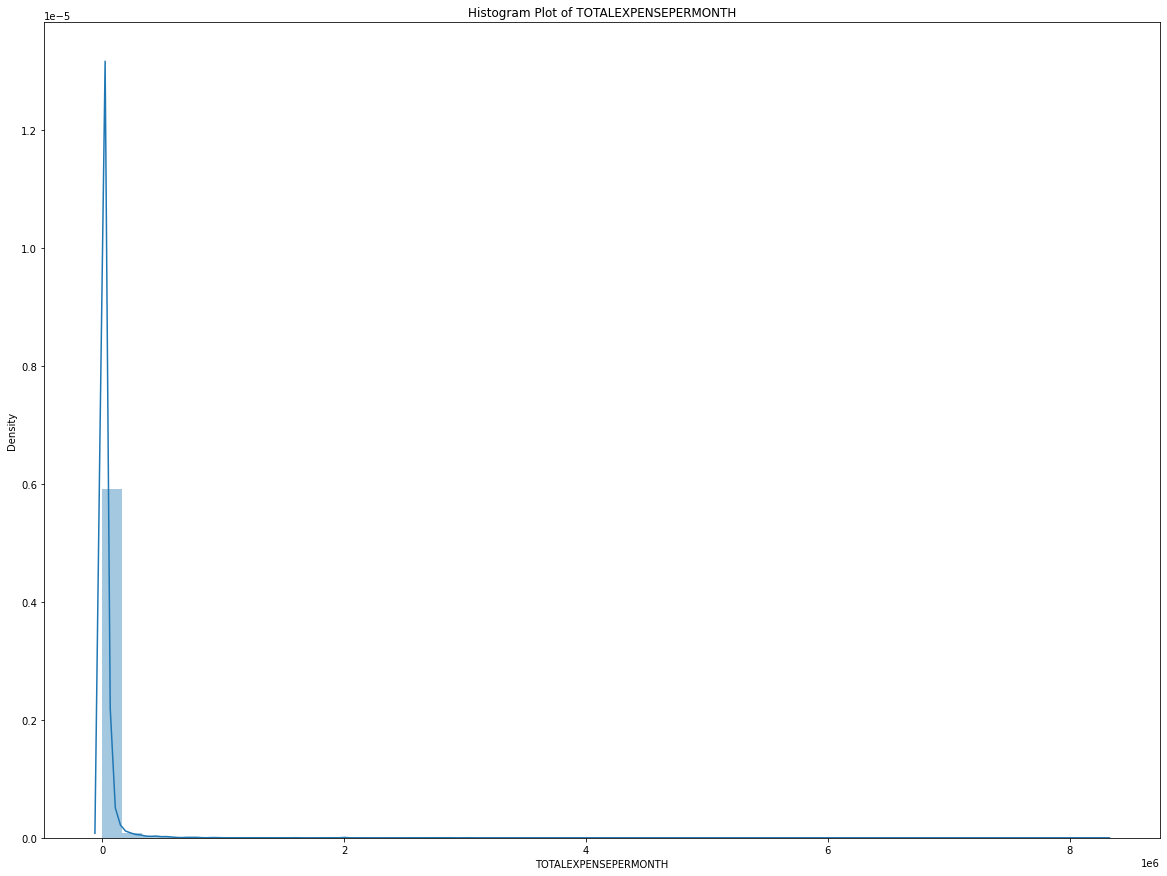

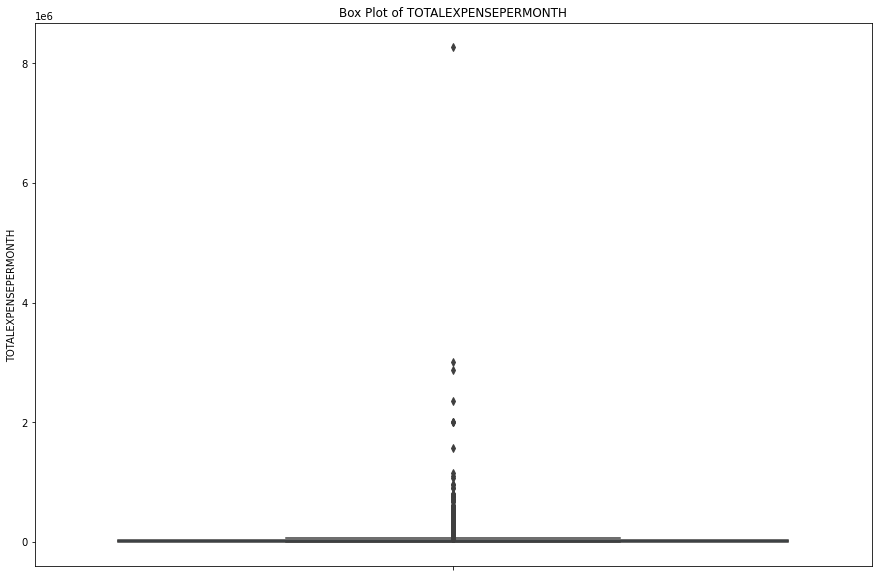

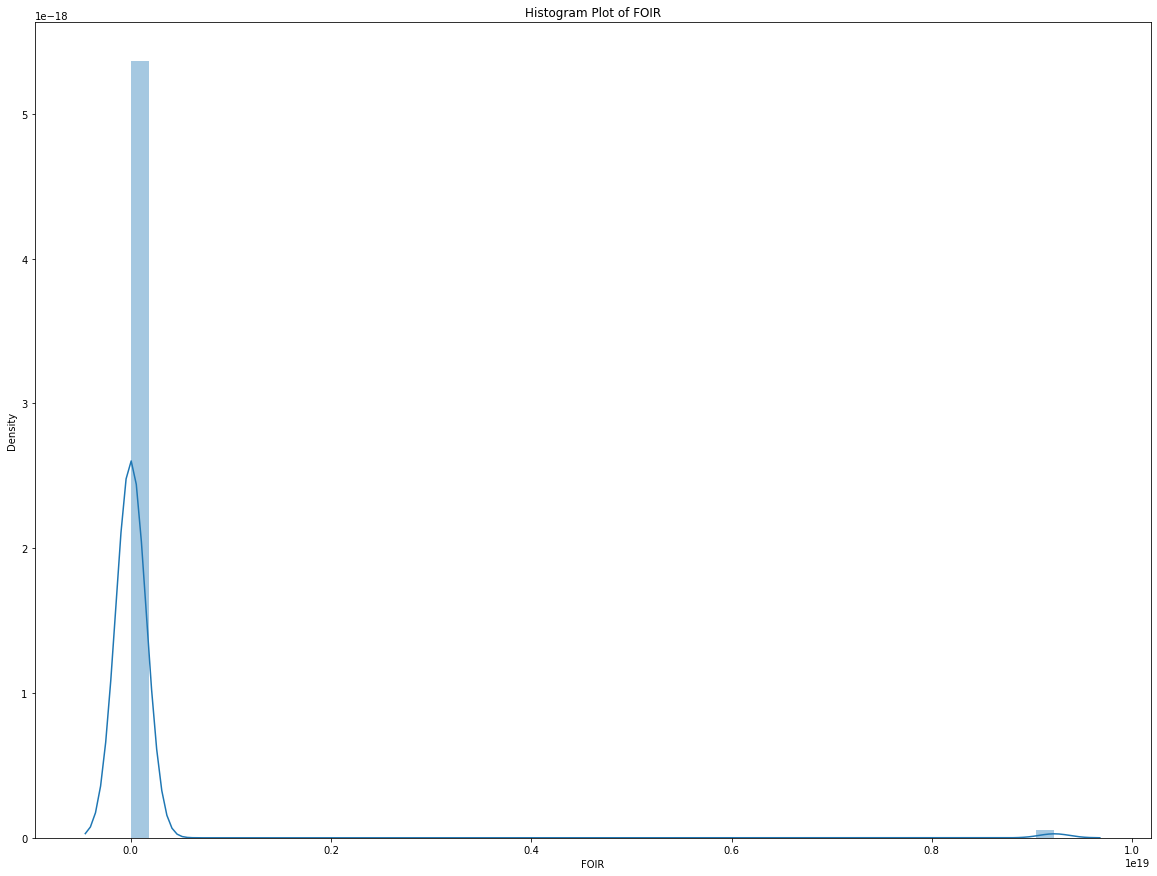

In [18]:
# Plotting Histogram Plot & Box plot for all Continious Columns
for i in Continious_columns:
    try:
        print("\n")
        snsplots.HistogramChart("Histogram Plot of "+i,i)
        print("\n")
        snsplots.BoxplotMChart("Box Plot of "+i,[i])
        print('\n\n')
    except:
        print("Could not produce Plot "+i)

### b) Plotting Numeric vs Target (Good_Bad)

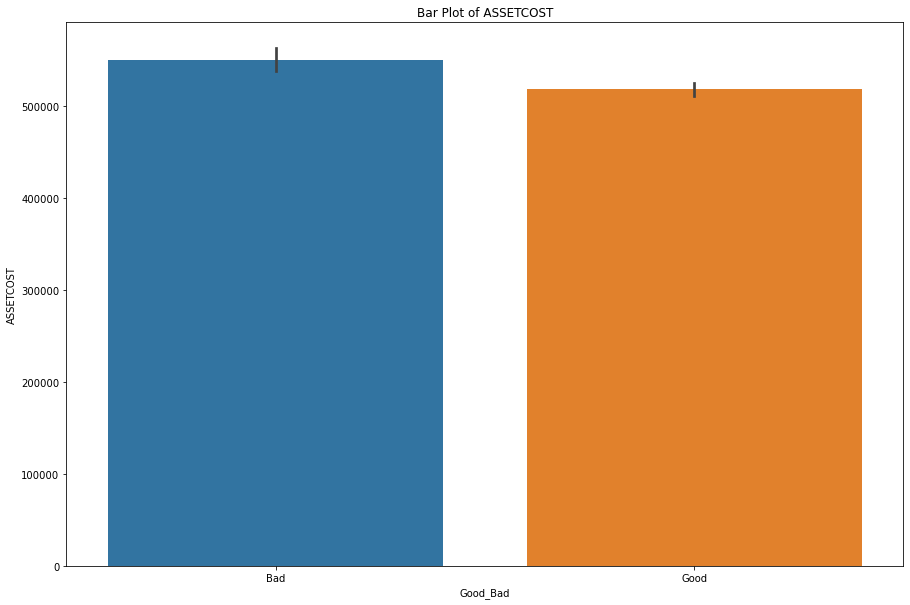

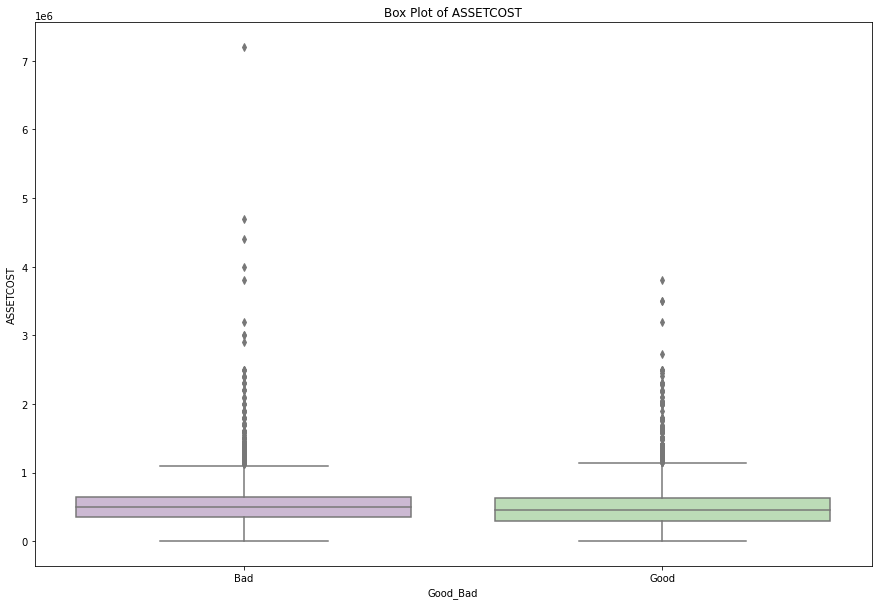

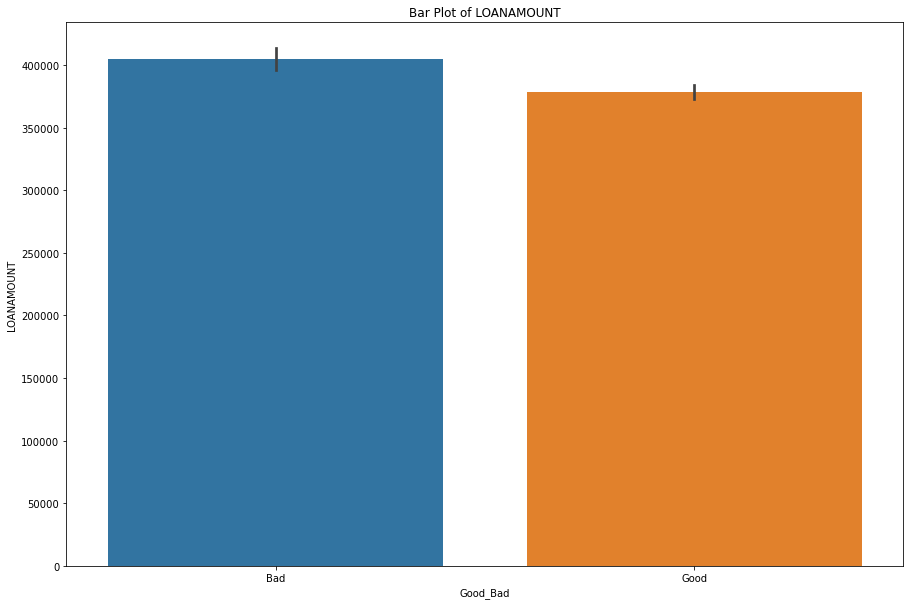

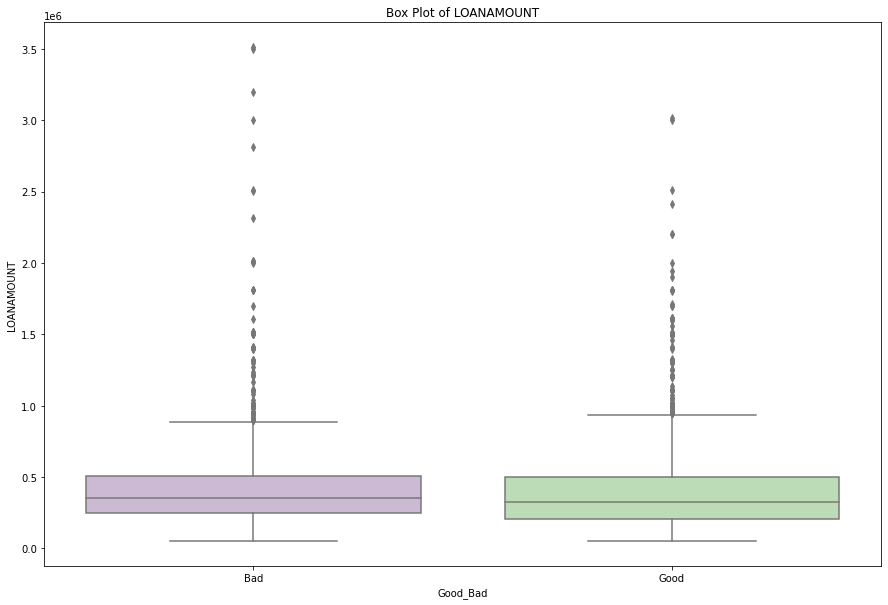

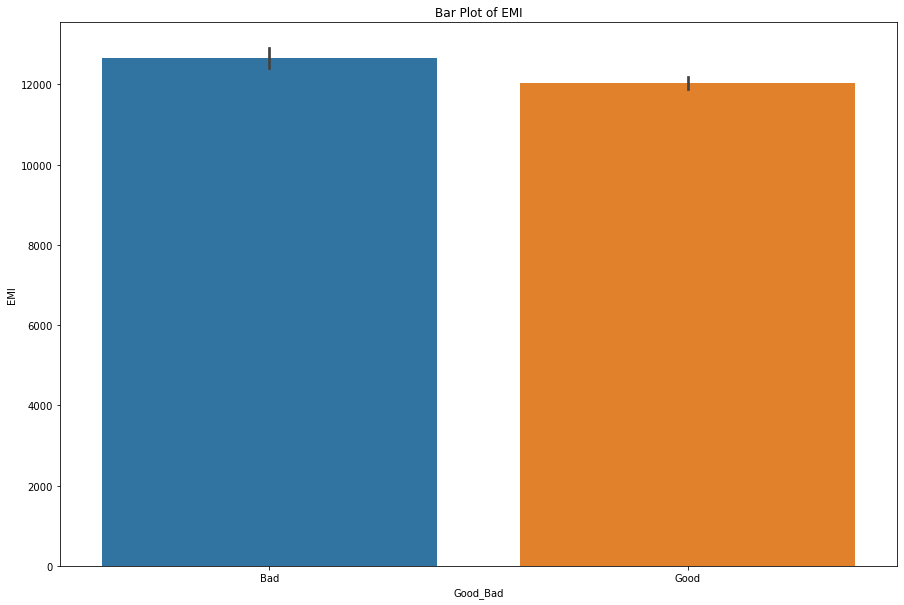

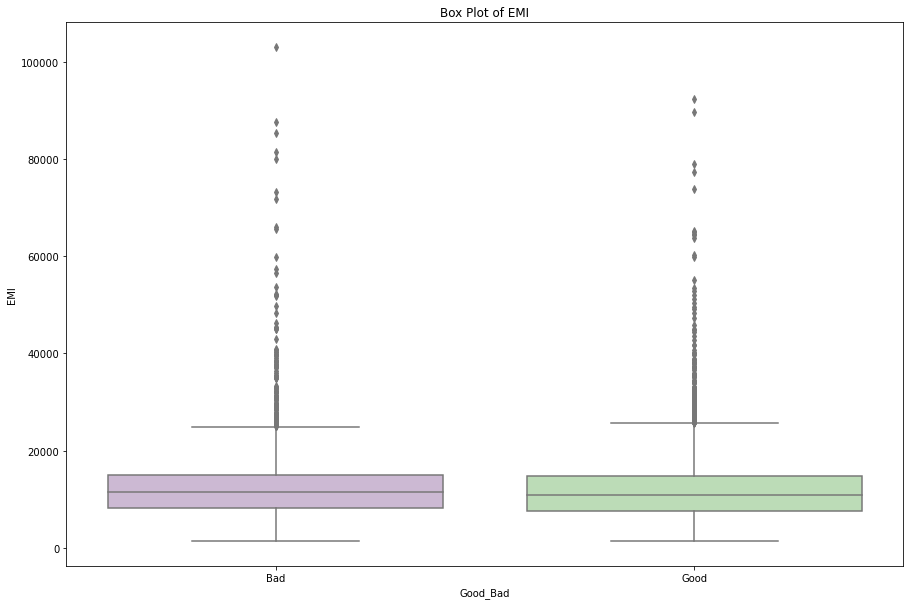

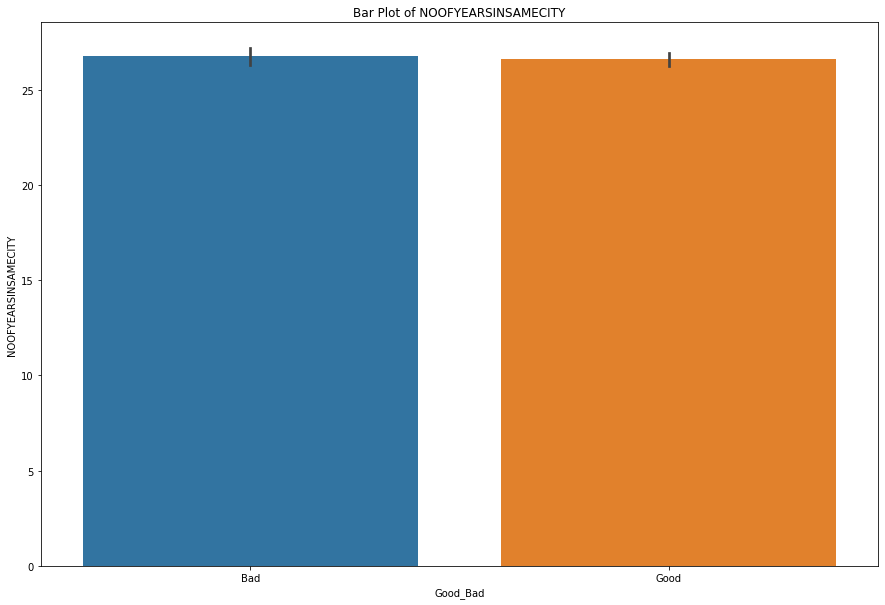

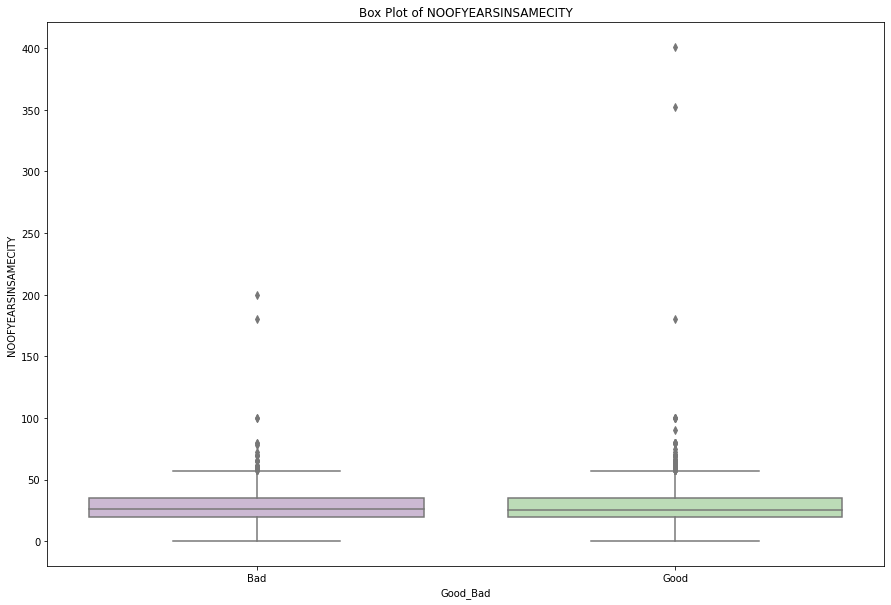

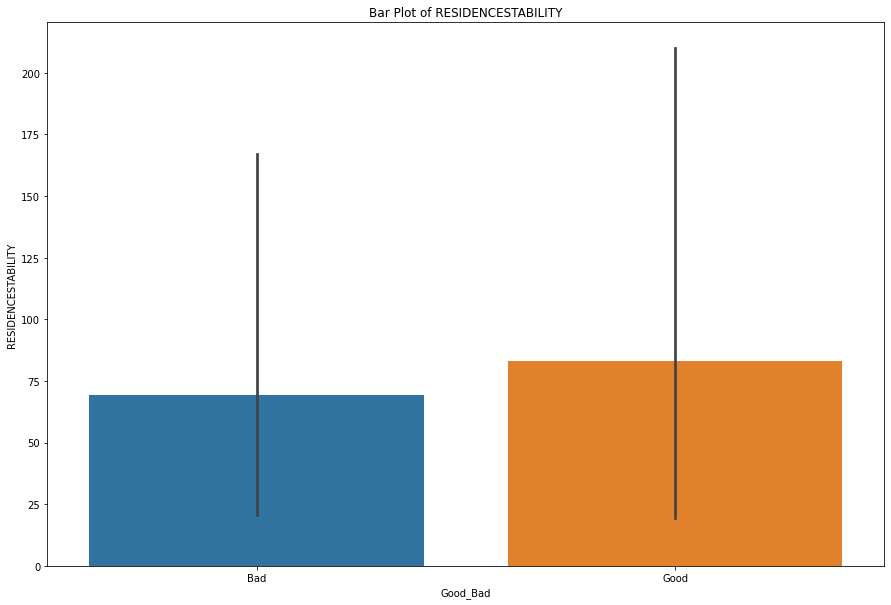

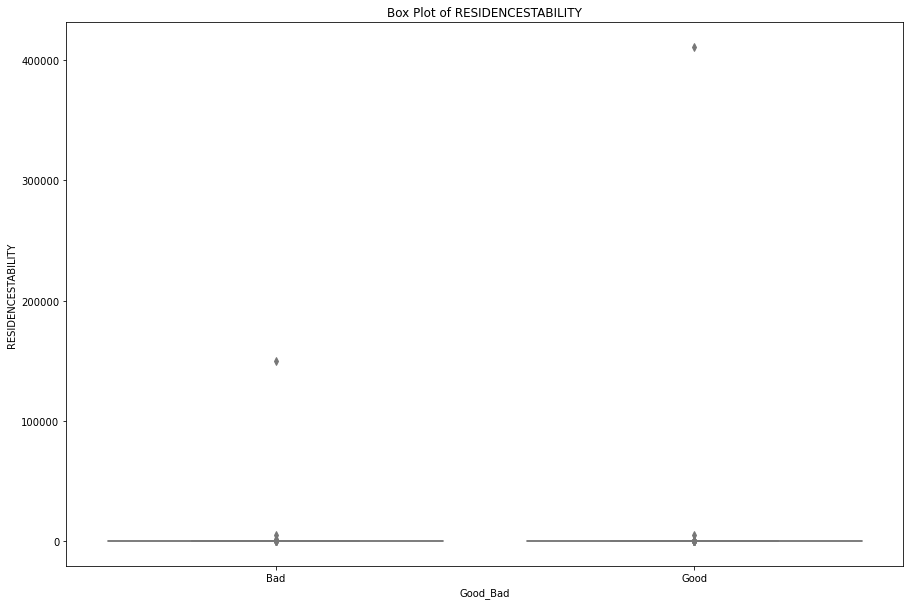

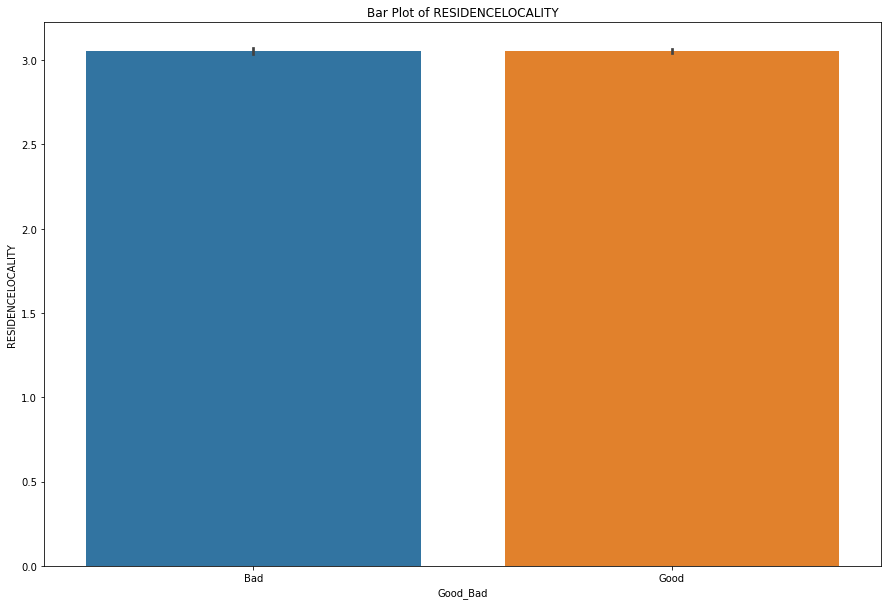

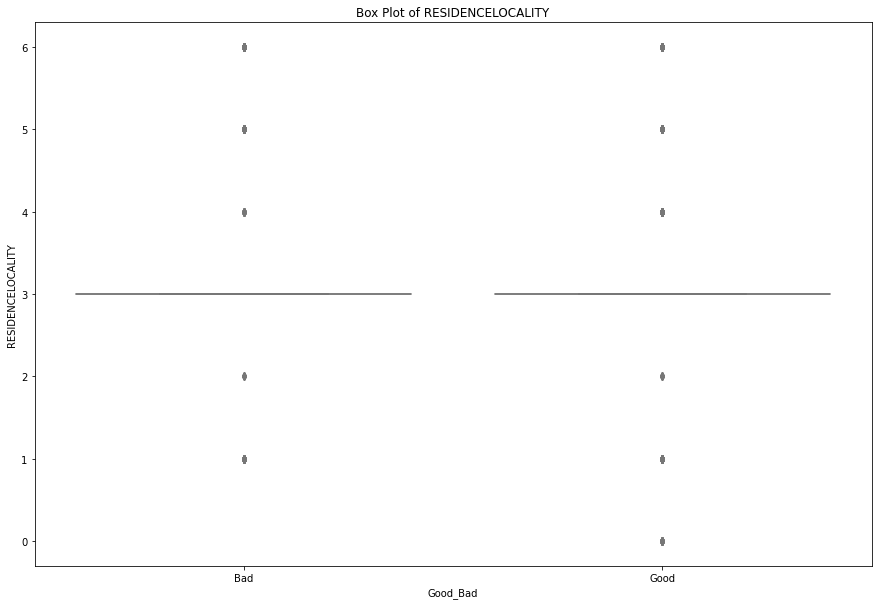

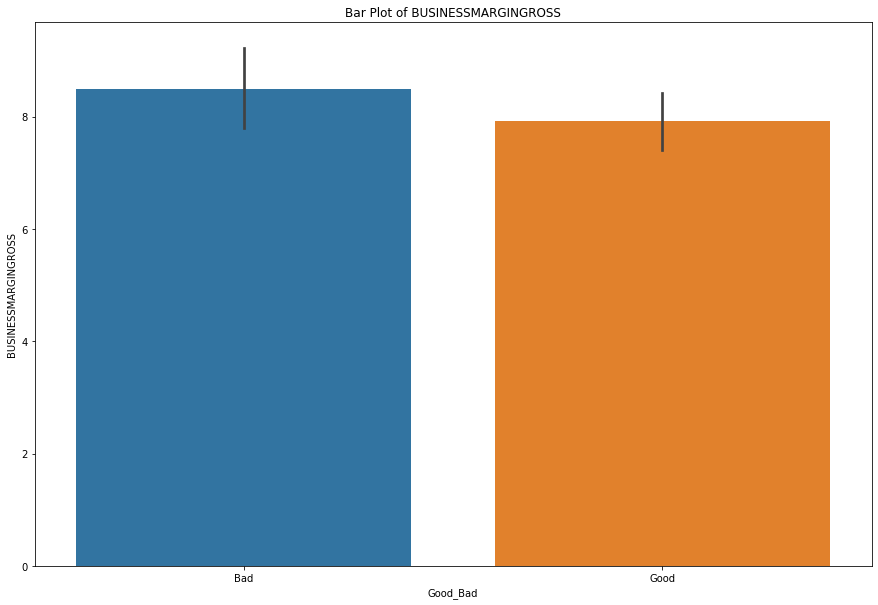

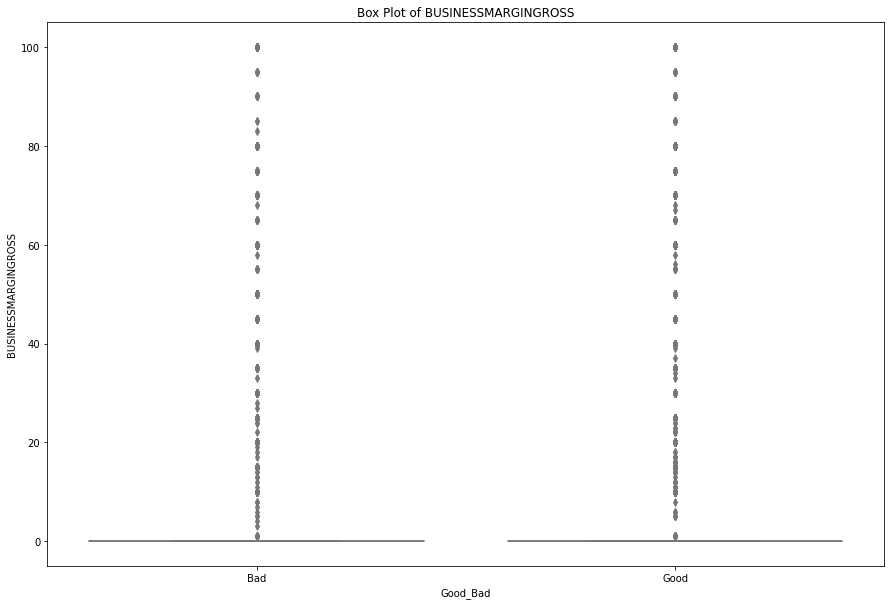

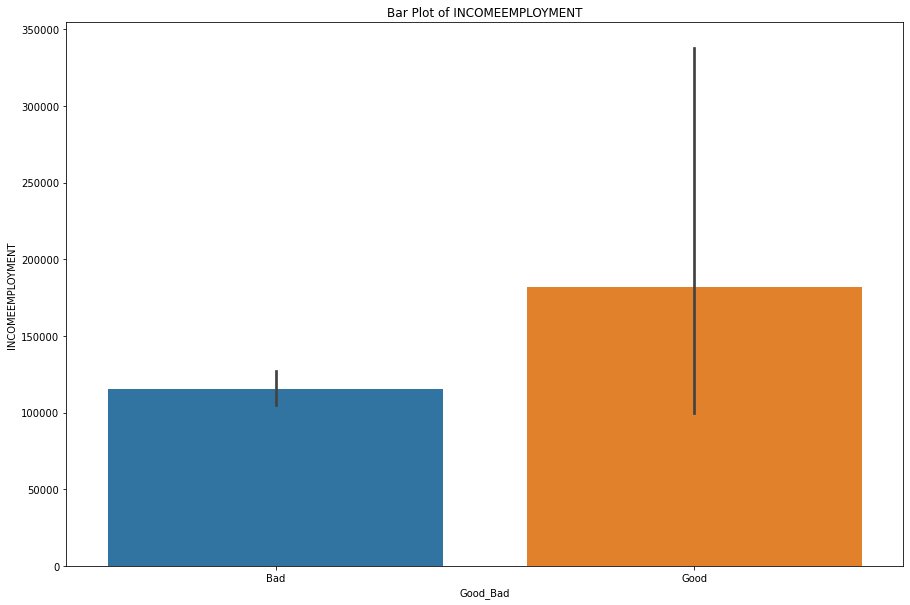

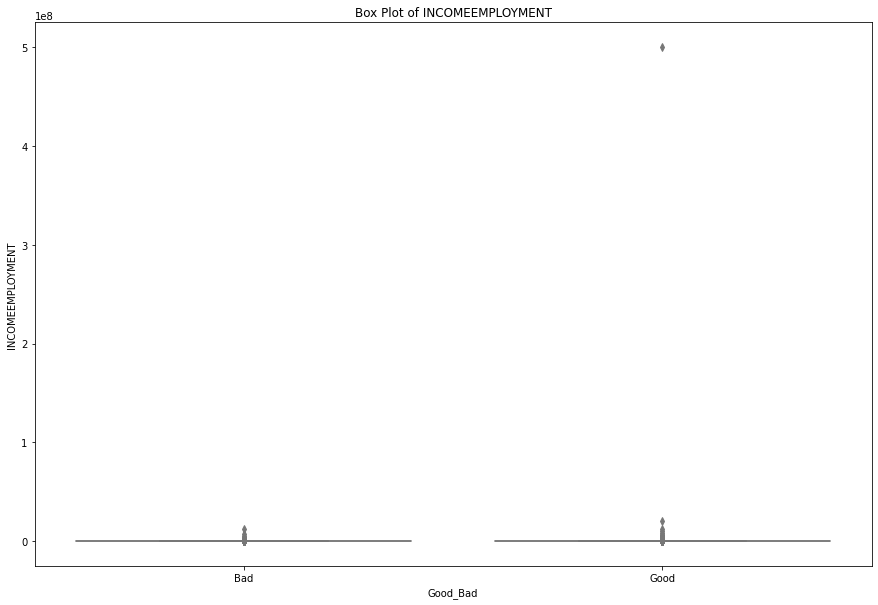

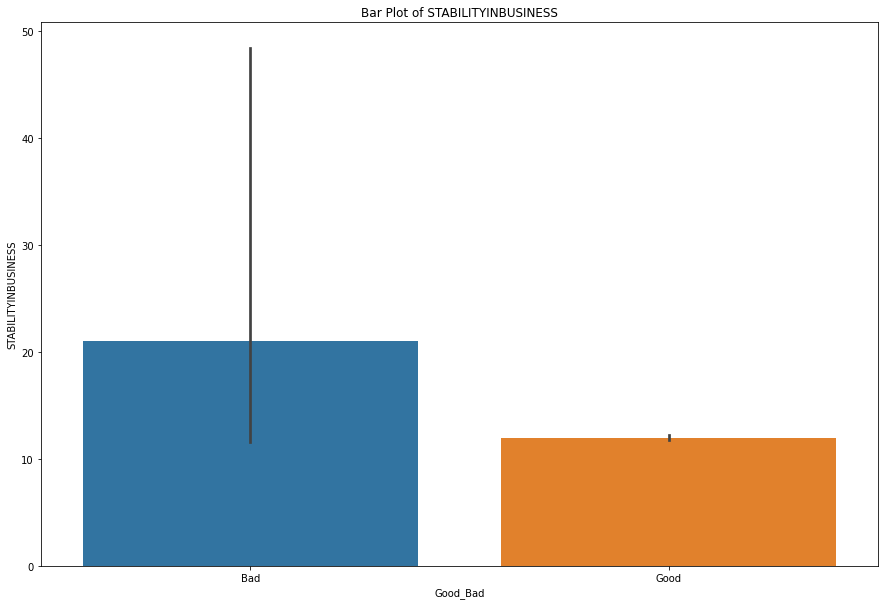

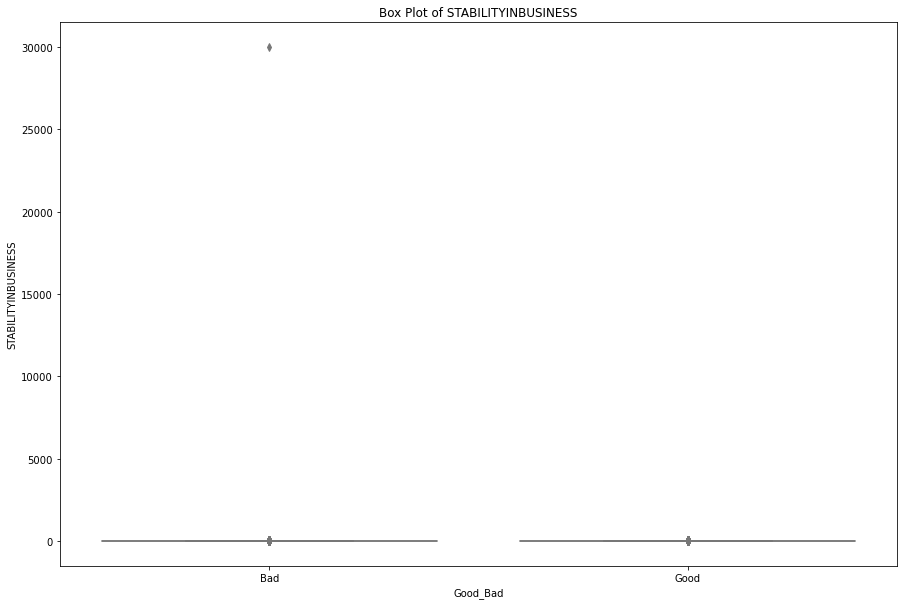

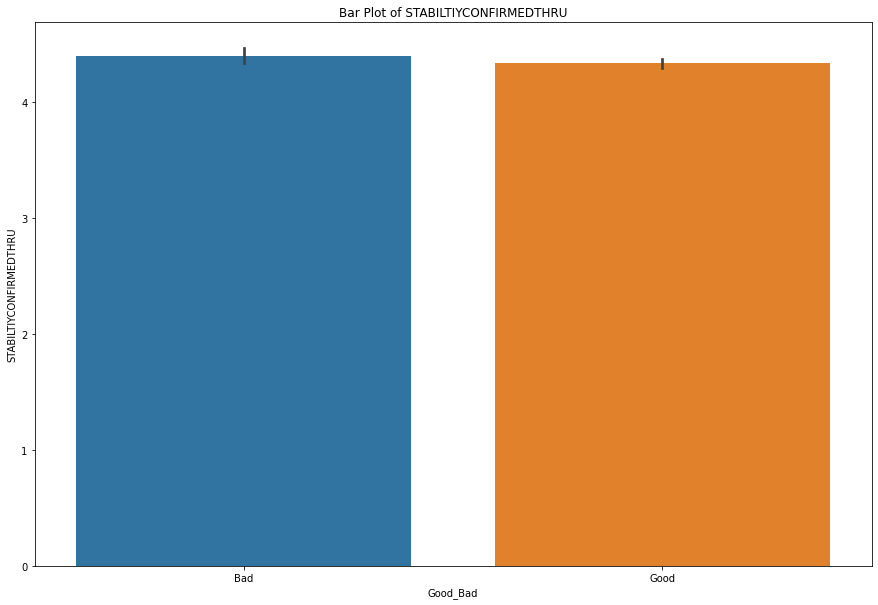

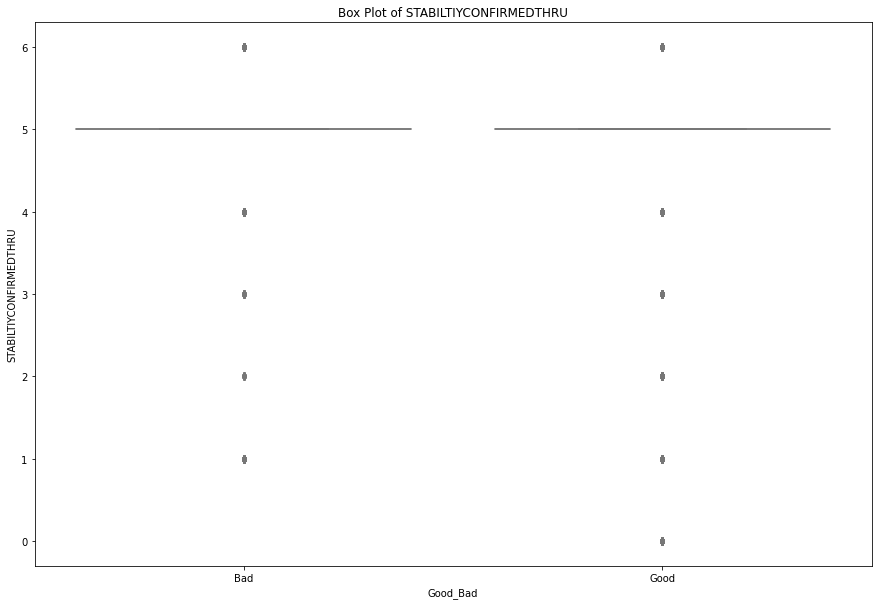

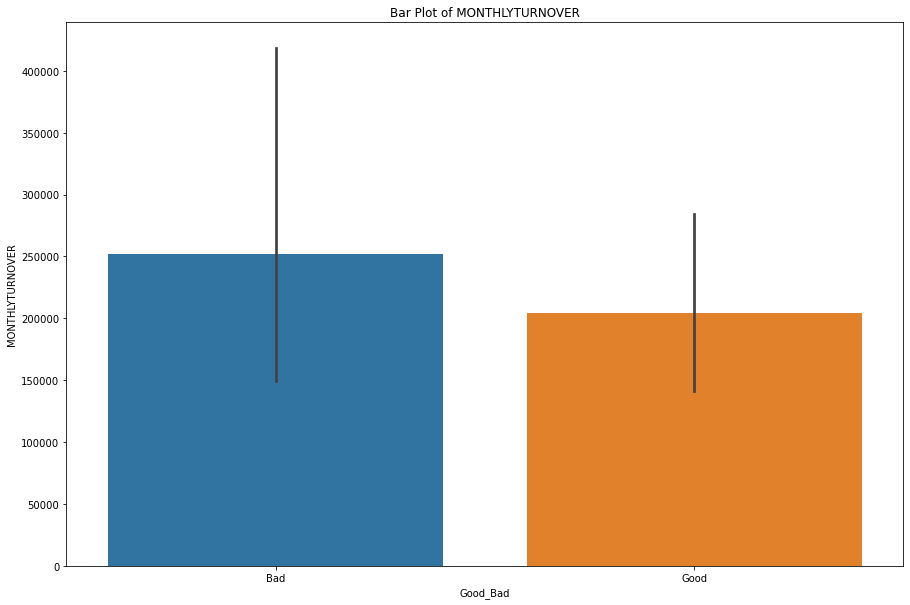

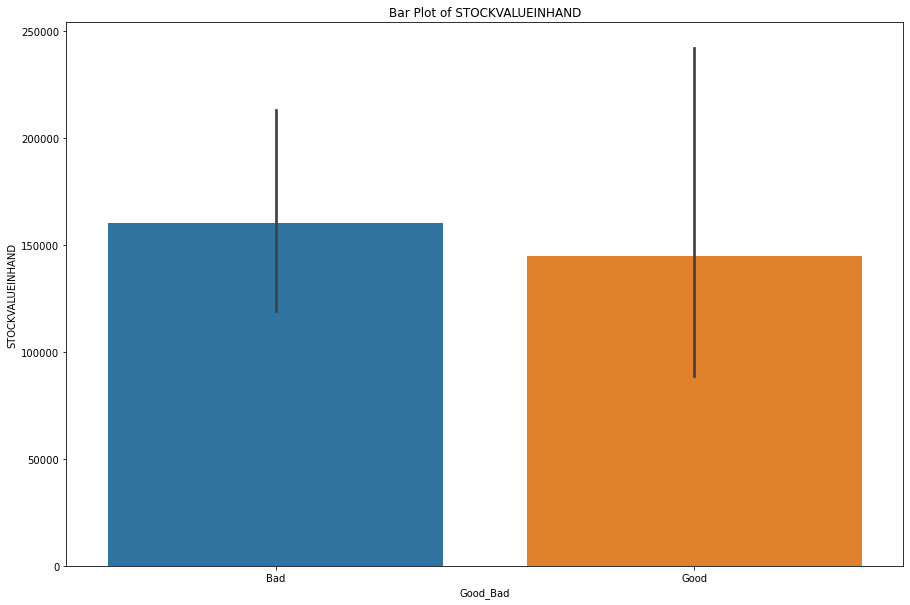

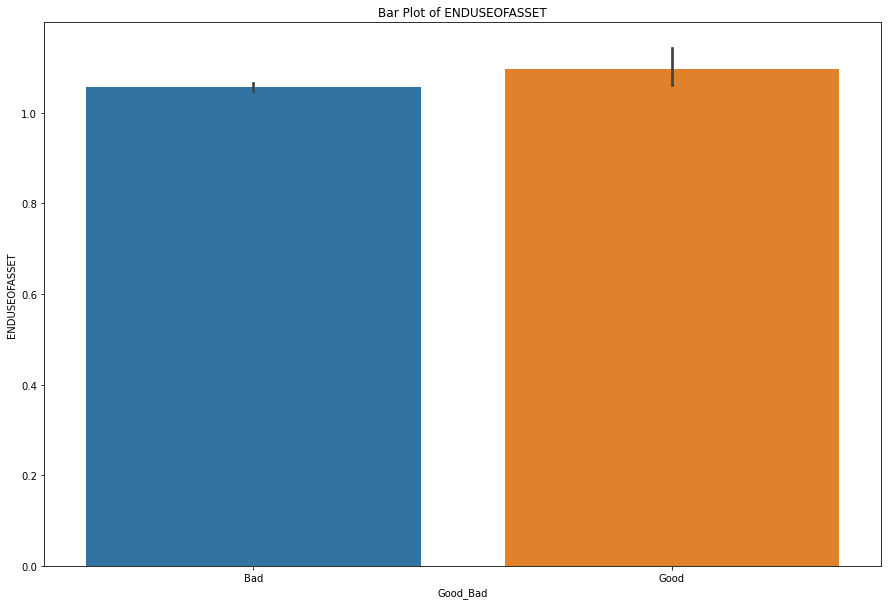

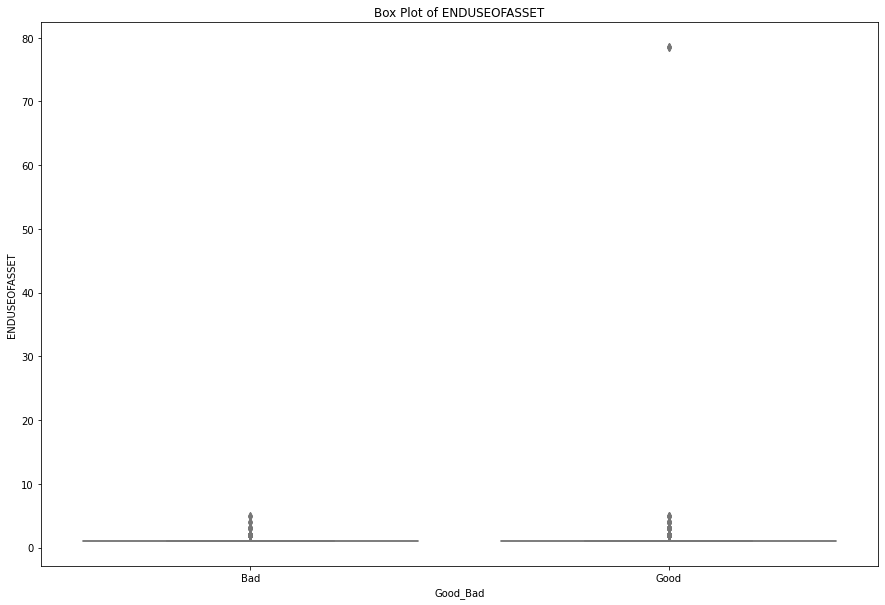

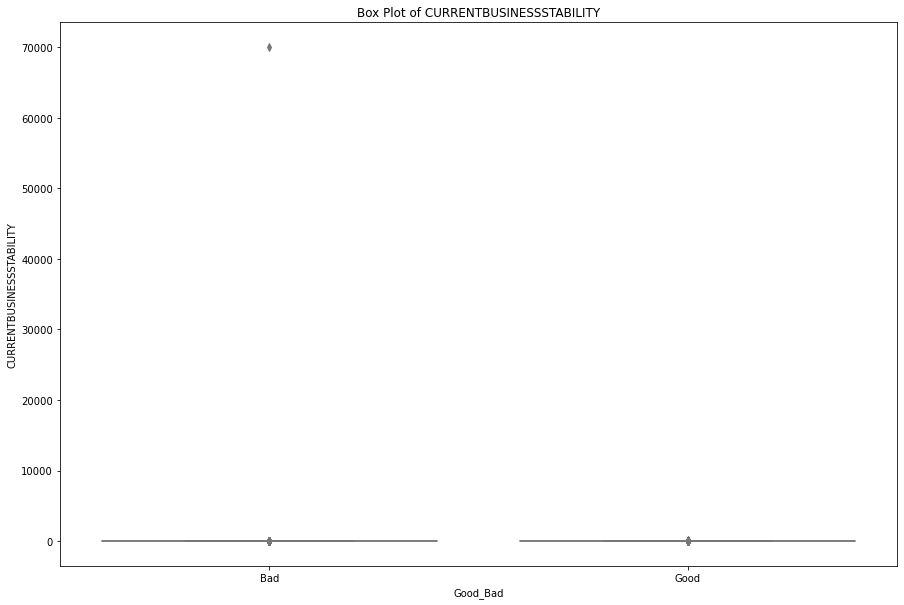

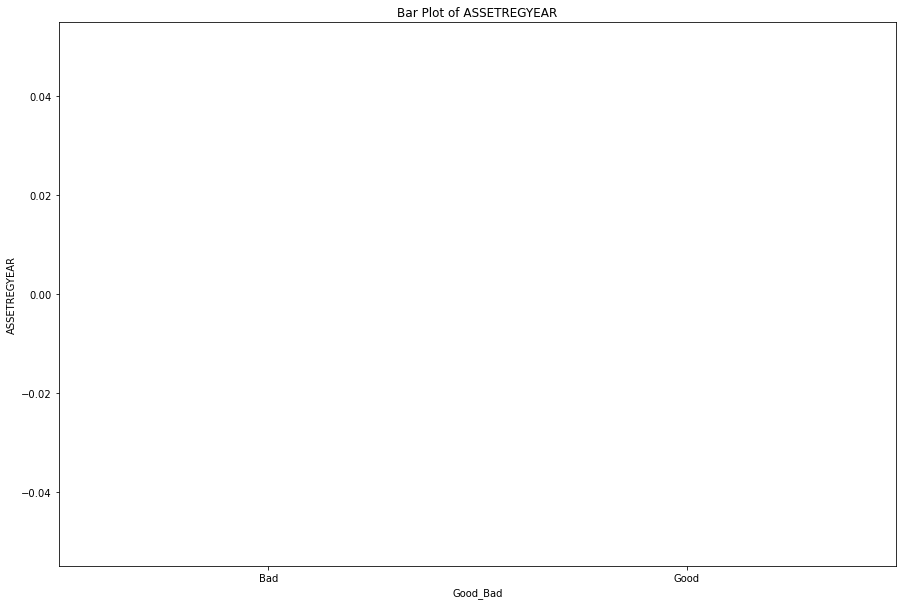

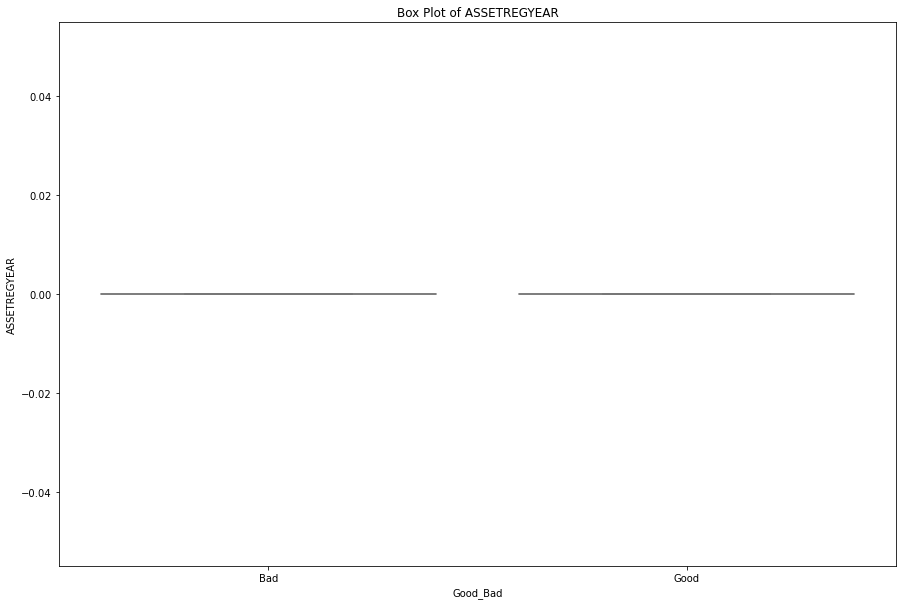

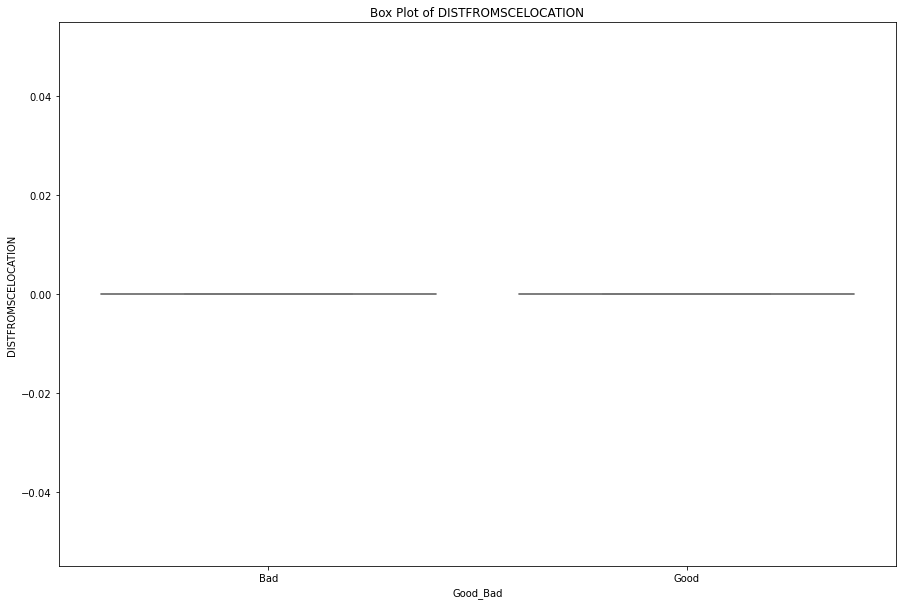

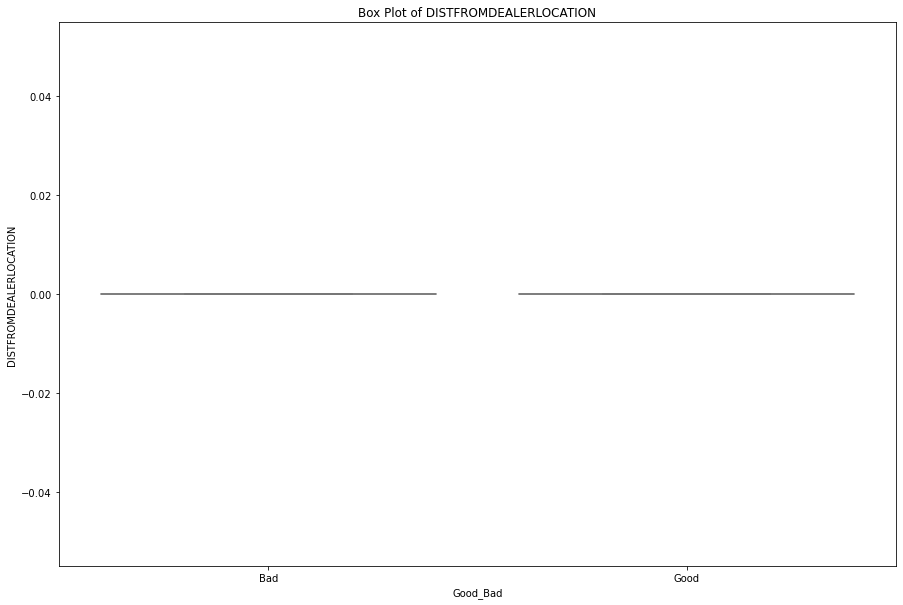

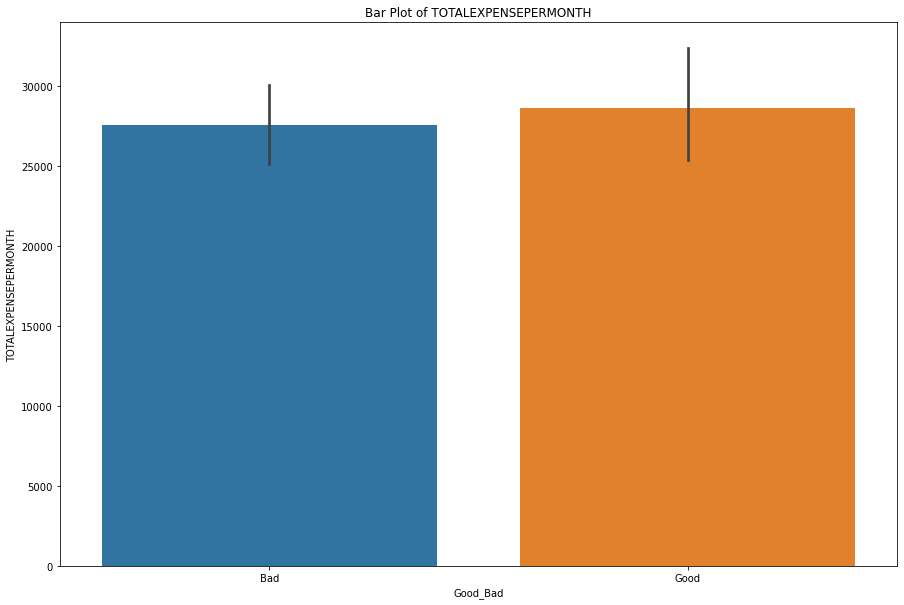

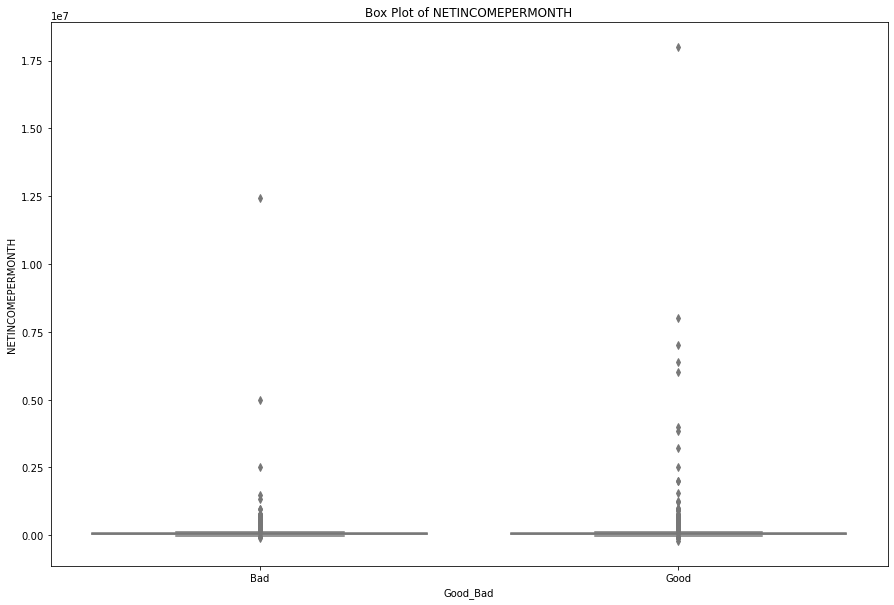

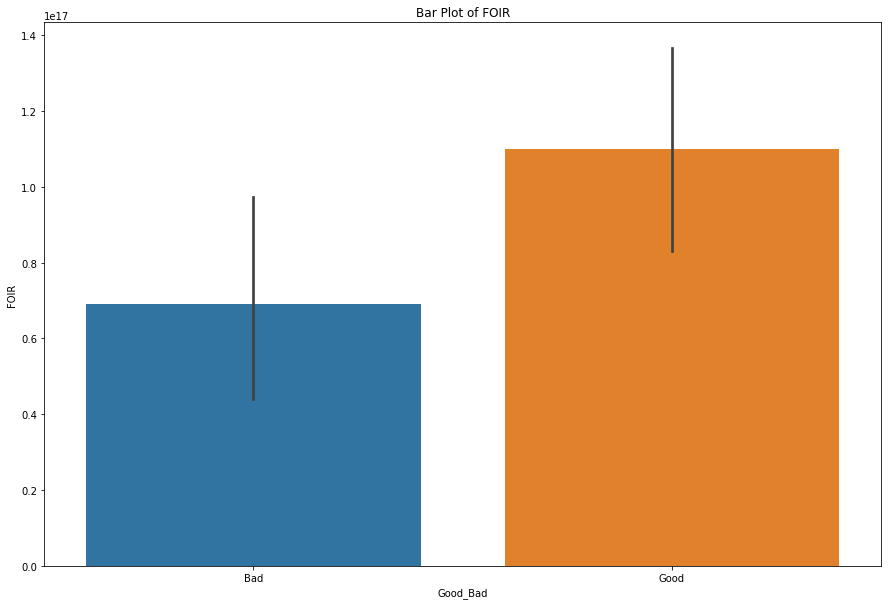

In [19]:
# Plotting Bar Plot & Box plot for all Continious Columns vs Good_Bad
for i in Continious_columns:
    try:
        print("\n")
        snsplots.BarChart("Bar Plot of "+i,['Good_Bad',i])
        print("\n")
        snsplots.BoxplotMChart("Box Plot of "+i,['Good_Bad',i])
        print('\n\n')
    except:
        print("Could not produce Plot "+i)

# Feature Selection Method

In [20]:
# Information Gain
imp_feature = mutual_info_classif(X_temp,Y_temp)
feat_importances = pd.Series(imp_feature,index=X_temp.columns[0:])
feat_importances.plot.bar(color='steelblue', figsize=(12, 6))

<AxesSubplot:>

<AxesSubplot:>

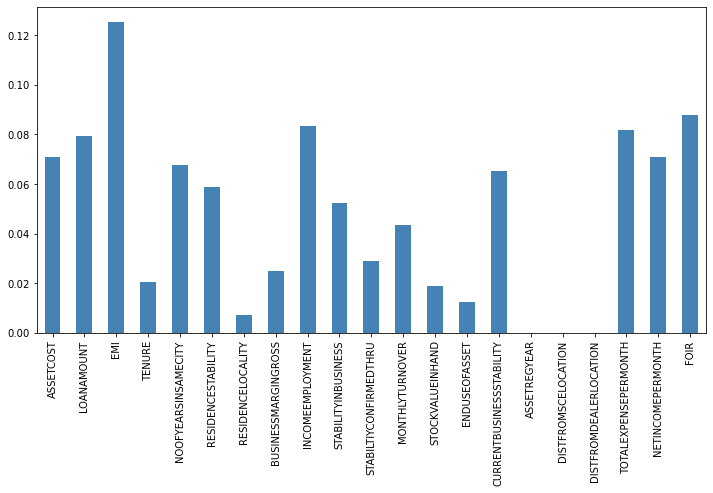

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_temp,Y_temp)

pd.Series(clf.feature_importances_, index=X_temp.columns[0:]).plot.bar(color='steelblue', figsize=(12, 6))